# Parcial 1 - Ciencia de Datos Aplicada
María Catalina Ibáñez Piñeres - 201922462

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# change the number columns displyaed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# read json file as dataframe
items_df = pd.read_json('items.json')
search_results_df = pd.read_json('search_results.json')
sellers_df = pd.read_json('sellers.json')

## Punto 1: Reporte de calidad y preparación de datos

In [4]:
items_df.columns

Index(['id', 'site_id', 'title', 'seller_id', 'category_id',
       'official_store_id', 'price', 'base_price', 'original_price',
       'currency_id', 'initial_quantity', 'sale_terms', 'buying_mode',
       'listing_type_id', 'condition', 'permalink', 'thumbnail_id',
       'thumbnail', 'pictures', 'video_id', 'descriptions',
       'accepts_mercadopago', 'non_mercado_pago_payment_methods', 'shipping',
       'international_delivery_mode', 'seller_address', 'seller_contact',
       'location', 'coverage_areas', 'attributes', 'listing_source',
       'variations', 'status', 'sub_status', 'tags', 'warranty',
       'catalog_product_id', 'domain_id', 'parent_item_id', 'deal_ids',
       'automatic_relist', 'date_created', 'last_updated', 'health',
       'catalog_listing'],
      dtype='object')

In [5]:
items_df.shape

(984, 45)

In [6]:
items_df.head()

,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,original_price,currency_id,initial_quantity,sale_terms,buying_mode,listing_type_id,condition,permalink,thumbnail_id,thumbnail,pictures,video_id,descriptions,accepts_mercadopago,non_mercado_pago_payment_methods,shipping,international_delivery_mode,seller_address,seller_contact,location,coverage_areas,attributes,listing_source,variations,status,sub_status,tags,warranty,catalog_product_id,domain_id,parent_item_id,deal_ids,automatic_relist,date_created,last_updated,health,catalog_listing
0,MCO2496457152,MCO,Teléfono Inteligente I14 Pro Max Para Android ...,1757204237,MCO1055,NaN,321887,321887,NaN,COP,400,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_pro,new,https://articulo.mercadolibre.com.co/MCO-24964...,704278-CBT77196112918_072024,http://http2.mlstatic.com/D_704278-CBT77196112...,"[{'id': '704278-CBT77196112918_072024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",DDP,"{'city': {'id': 'Q04tR0RTaGVuemhlbg', 'name': ...",NaN,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 183458924907, 'price': 321887, 'attrib...",active,[],"[cbt_item, catalog_listing_eligible, good_qual...",Garantía del vendedor: 60 días,MCO26683909,MCO-CELLPHONES,None,[],False,2024-07-02T18:01:35.696Z,2024-09-21T14:49:03.811Z,0.77,False
1,MCO1468027022,MCO,Celular 4g Teclas Grandes Adulto Mayor Fm Lint...,74858296,MCO1055,NaN,299999,299999,NaN,COP,12,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-14680...,640212-MCO54960987110_042023,http://http2.mlstatic.com/D_640212-MCO54960987...,"[{'id': '640212-MCO54960987110_042023', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,"{'city': {'id': 'TUNPQ0tFTjQyODYy', 'name': 'K...",NaN,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 178017181497, 'price': 299999, 'attrib...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía del vendedor: 3 meses,None,MCO-CELLPHONES,None,[],False,2023-04-18T16:13:28.000Z,2024-07-23T10:42:48.665Z,0.80,False
2,MCO2312649730,MCO,Celular Tecno Camon 30 + Buds,224855110,MCO1055,NaN,870000,870000,NaN,COP,11,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-23126...,730936-MCO75643494203_042024,http://http2.mlstatic.com/D_730936-MCO75643494...,"[{'id': '765605-MCO75643920657_042024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ0FOVDMyNjIx', 'name': 'A...",NaN,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 182383392891, 'price': 870000, 'attrib...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía de fábrica: 12 meses,None,MCO-CELLPHONES,None,[],False,2024-04-07T15:38:43.630Z,2024-09-13T08:52:56.526Z,0.90,False
3,MCO2613414884,MCO,Infinix Smart 8 Pro Dual Sim 256 Gb Negro 8 Gb...,244320949,MCO1055,NaN,600000,600000,NaN,COP,1,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_pro,new,https://articulo.mercadolibre.com.co/MCO-26134...,887258-MLA77434202893_072024,http://http2.mlstatic.com/D_887258-MLA77434202...,"[{'id': '887258-MLA77434202893_072024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ1JBRjkyNTA2', 'name': 'R...",NaN,{},[],"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",,[],active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía de fábrica: 12 meses,MCO37988144,MCO-CELLPHONES,None,[],False,2024-08-14T18:00:42.417Z,2024-08-14T18:01:21.446Z,NaN,True
4,MCO2162818940,MCO,Tecno Spark Go 2024 4+128 Gb Color Blanco,1091466329,MCO1055,NaN,349900,349900,NaN,COP,73,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-21628...,704284-MLU73724904911_122023,http://http2.ml

In [7]:
search_results_df.columns

Index(['id', 'title', 'condition', 'thumbnail_id', 'catalog_product_id',
       'listing_type_id', 'sanitized_title', 'permalink', 'buying_mode',
       'site_id', 'category_id', 'domain_id', 'thumbnail', 'currency_id',
       'order_backend', 'price', 'original_price', 'sale_price',
       'available_quantity', 'official_store_id', 'use_thumbnail_id',
       'accepts_mercadopago', 'shipping', 'stop_time', 'seller', 'attributes',
       'installments', 'winner_item_id', 'catalog_listing', 'discounts',
       'promotions', 'inventory_id', 'differential_pricing',
       'official_store_name', 'variation_filters', 'variations_data'],
      dtype='object')

In [8]:
search_results_df.head()

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,differential_pricing,official_store_name,variation_filters,variations_data
0,MCO2429633128,Xiaomi Redmi Note 13 4g Dual Sim 256 Gb Negro ...,new,909752-MLA75257662226_032024,MCO29751162,gold_special,xiaomi-redmi-note-13-4g-dual-sim-256-gb-negro-...,https://www.mercadolibre.com.co/xiaomi-redmi-n...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_909752-MLA75257662...,COP,1,618900.0,999900.0,"{'price_id': '', 'amount': 618900, 'conditions...",50,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-06-30 18:22:13.885000+00:00,"{'id': 1801699380, 'nickname': 'OFFERBUYS'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 17192, 'rate': 0, '...",NaN,True,NaN,[],BCNX70197,NaN,NaN,NaN,NaN
1,MCO1388200741,Xiaomi Redmi Note 13 Pro+ 5g Dual Sim 512 Gb N...,new,748621-MLA76569863127_052024,MCO29740920,gold_pro,xiaomi-redmi-note-13-pro-5g-dual-sim-512-gb-ne...,https://www.mercadolibre.com.co/xiaomi-redmi-n...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_748621-MLA76569863...,COP,2,1553400.0,2589000.0,"{'price_id': '', 'amount': 1553400, 'condition...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-08-04 17:49:54.210000+00:00,"{'id': 312658824, 'nickname': 'ALDNET TIENDAVI...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 12, 'amount': 129450, 'rate': 0, ...",NaN,True,NaN,[],NETJ84663,{'id': 33602181},NaN,NaN,NaN
2,MCO2325852928,Samsung Galaxy A55 5g Dual Sim 256 Gb Azul Cla...,new,828557-MLA75148190826_032024,MCO34731719,gold_special,samsung-galaxy-a55-5g-dual-sim-256-gb-azul-cla...,https://www.mercadolibre.com.co/samsung-galaxy...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_828557-MLA75148190...,COP,3,1395900.0,1929900.0,"{'price_id': '', 'amount': 1395900, 'condition...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-04-10 04:00:00+00:00,"{'id': 406781619, 'nickname': 'TECHNOLOGYRIVER'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 38775, 'rate': 0, '...",NaN,True,NaN,[],CTFU88562,NaN,NaN,NaN,NaN
3,MCO1473059645,Xiaomi Redmi 13c Dual Sim 256 Gb Clover Green ...,new,627160-MLA76381275010_052024,MCO37046933,gold_special,xiaomi-redmi-13c-dual-sim-256-gb-clover-green-...,https://www.mercadolibre.com.co/xiaomi-redmi-1...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_627160-MLA76381275...,COP,4,436900.0,NaN,"{'price_id': '', 'amount': 436900, 'conditions...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-08-24 04:00:00+00:00,"{'id': 291001852, 'nickname': 'TECNOSUPER.'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 12136, 'rate': 0, '...",NaN,True,NaN,[],HRME95872,NaN,NaN,NaN,NaN
4,MCO2208945346,Samsung Galaxy S23 Ultra (esim) 5g Dual Sim 25...,new,699790-MLA73150348157_112023,MCO24593994,gold_special,samsung-galaxy-s23-ultra-esim-5g-dual-sim-256-...,https://www.mercadolibre.com.co/samsung-galaxy...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_699790-MLA73150348...,COP,5,3455928.0,4799900.0,"{'price_id': '', 'amount': 3455928, 'condition...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-02-10 04:00:00+00:00,"{'id': 476229825, 'nickname': 'RIVERTECHNOLOGY...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 95998, 'rate': 0, '...",NaN,True,NaN,[],None,NaN,NaN,NaN,NaN


In [9]:
sellers_df.columns

Index(['id', 'nickname', 'country_id', 'address', 'user_type', 'site_id',
       'permalink', 'seller_reputation', 'status'],
      dtype='object')

In [10]:
sellers_df.head()

,id,nickname,country_id,address,user_type,site_id,permalink,seller_reputation,status
0,1305122305,SASNEXTMOVIL20230207170924,CO,"{'city': 'Usaquén', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/SASNEXTMOVIL...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
1,819549189,LUISALEJANDROPASCAGAZAPINZN,CO,"{'city': 'Suba', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/LUISALEJANDR...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
2,582439941,UDM SHOP,CO,"{'city': 'Medellín', 'state': 'CO-ANT'}",normal,MCO,http://perfil.mercadolibre.com.co/UDM+SHOP,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
3,738767370,EASYBUYSHOPCOMCO,CO,"{'city': 'Pereira', 'state': 'CO-RIS'}",normal,MCO,http://perfil.mercadolibre.com.co/EASYBUYSHOPC...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
4,224086027,SMART_PURCHASE14,CO,"{'city': 'Suba', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/SMART_PURCHA...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}


En primer lugar, se van a escoger las columnas que se consideran relevantes para el análisis. 

Las columnas escogidas del archivo `items.json` son las siguientes:
- id: identificador único del item, esta columna se usará para poder unir un item/producto con el su información en el archivo de `search_results.json`.
- seller_id: identificador único del vendedor, esta columna se usará para poder unir un item/producto con la información de su vendedor en el archivo de `sellers.json`.
- price: precio del item. Importante para garantizar que el precio este en el rango preferido.
- currency_id: moneda del precio del item. Importante para saber si el precio está en pesos colombianos.
- warranty: garantía del item. Importante para garantizar que la garantía sea la deseada.
- seller_address: dirección del vendedor. Importante para saber si el vendedor está cerca de mi mamá. (Importante: que la persona esté en Colombia).
- attributes: atributos del item. Importante para conocer el tamaño del display del celular.

Las columnas escogidas del archivo `search_results.json` son las siguientes:
- id: identificador único del item, esta columna se usará para poder unir un item/producto con su información en el archivo de `items.json`.
- attributes: atributos del item. Importante para conocer el color, tamaño, etc. del celular.
- official_store_name: nombre de la tienda oficial. Importante para saber si el item es de una tienda oficial.
- shipping: información sobre el shipping. Importante para saber si el vendedor ofrece envío gratis (`free_shipping == True`).

Las columnas escogidas del archivo `sellers.json` son las siguientes:
- id: identificador único del vendedor, esta columna se usará para poder unir el vendedor con su información en el archivo de `items.json`.
- seller_reputation: reputación del vendedor. Específicamente nos interesa el level_id, para saber si el vendedor es un vendedor verde.

In [11]:
# Tomamos las columnas que nos interesan
items = items_df[["id", "seller_id", "currency_id", "price", "attributes", "warranty", "seller_address"]]
sellers = sellers_df[["id", "seller_reputation"]]
search_results = search_results_df[["id", "attributes", "official_store_name", "shipping"]]

### Análisis univariado de las columnas escogidas para revisión de calidad de datos y preparación de los mismos

#### Archivo `items.json`

In [12]:
# Miremos el archivo de items
items.head()

,id,seller_id,currency_id,price,attributes,warranty,seller_address
0,MCO2496457152,1757204237,COP,321887,"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",Garantía del vendedor: 60 días,"{'city': {'id': 'Q04tR0RTaGVuemhlbg', 'name': ..."
1,MCO1468027022,74858296,COP,299999,"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",Garantía del vendedor: 3 meses,"{'city': {'id': 'TUNPQ0tFTjQyODYy', 'name': 'K..."
2,MCO2312649730,224855110,COP,870000,"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",Garantía de fábrica: 12 meses,"{'city': {'id': 'TUNPQ0FOVDMyNjIx', 'name': 'A..."
3,MCO2613414884,244320949,COP,600000,"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",Garantía de fábrica: 12 meses,"{'city': {'id': 'TUNPQ1JBRjkyNTA2', 'name': 'R..."
4,MCO2162818940,1091466329,COP,349900,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",Garantía de fábrica: 12 meses,"{'city': {'id': 'TUNPQ1NVQjUzNzQ4', 'name': 'S..."


In [13]:
items.shape

(984, 7)

In [14]:
items.isna().sum()

id                0
seller_id         0
currency_id       0
price             0
attributes        0
warranty          5
seller_address    0
dtype: int64

Como solo son 5 registros en `warranty` que están vacíos, podemos eliminarlos.

In [15]:
items.dropna(subset="warranty", inplace=True)

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/2475871821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items.dropna(subset="warranty", inplace=True)


In [16]:
# Miremos los tipos de datos
items.dtypes

id                object
seller_id          int64
currency_id       object
price              int64
attributes        object
warranty          object
seller_address    object
dtype: object

In [17]:
# Miramos cuantos id's únicos hay, lo que nos da una noción de si hay duplicados
items["id"].nunique()

979

##### 1. seller_id

In [18]:
# seller_id debería ser de tipo object, por lo que lo convertimos
items["seller_id"] = items["seller_id"].astype("object")

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/1670967210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items["seller_id"] = items["seller_id"].astype("object")


##### 2. currency_id

In [19]:
items["currency_id"].value_counts()

currency_id
COP    979
Name: count, dtype: int64

##### 3. warranty

In [20]:
items["warranty"].value_counts()

warranty
Garantía de fábrica: 12 meses      324
Garantía del vendedor: 30 días     138
Garantía del vendedor: 12 meses    104
Garantía del vendedor: 6 meses      79
Garantía del vendedor: 3 meses      52
Sin garantía                        43
Garantía de fábrica: 2 meses        37
Garantía de fábrica: 1 años         35
Garantía de fábrica: 6 meses        27
Garantía del vendedor: 60 días      17
Garantía del vendedor: 7 días       17
Garantía de fábrica: 24 meses       17
Garantía de fábrica: 3 meses        10
Garantía del vendedor: 1 meses      10
Garantía del vendedor: 90 días      10
Garantía del vendedor: 2 meses       8
Garantía del vendedor: 14 meses      7
Garantía del vendedor: 1 años        6
Garantía del vendedor: 2 años        6
Garantía del vendedor: 180 días      5
Garantía de fábrica: 12 días         5
Garantía de fábrica: 1 meses         5
Garantía del vendedor: 365 días      3
Garantía de fábrica: 10 meses        2
Garantía de fábrica: 60 días         2
Garantía de fábr

Como se puede ver `warranty` necesita una transformación para que sea más fácil de analizar. Se va a transformar la columna `warranty` en una columna `warranty_days` que contenga la cantidad de días de garantía que ofrece el vendedor y que sea de tipo `int`.

In [21]:
def extract_warranty_days(warranty):
    if warranty == "Sin garantía":
        return 0
   
    # Obtener el número y la unidad de tiempo
    parts = warranty.split(":")[1].strip().split(" ")
    num = int(parts[0])
    unit = parts[1]

    # Si la unidad es "meses", multiplicamos por 30, si es "días", lo dejamos tal cual
    if unit == "meses":
        return num * 30
    elif unit == "días":
        return num
    else:
        return 0  # En caso de que la unidad no sea reconocida

# Aplicamos la función a la columna 'warranty'
items["warranty_days"] = items["warranty"].apply(extract_warranty_days)

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/694914175.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items["warranty_days"] = items["warranty"].apply(extract_warranty_days)


In [22]:
items.drop(["warranty"], axis = 1, inplace=True)

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/3264036526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items.drop(["warranty"], axis = 1, inplace=True)


In [23]:
items["warranty_days"].describe()

count    979.000000
mean     211.663943
std      166.480967
min        0.000000
25%       30.000000
50%      180.000000
75%      360.000000
max      720.000000
Name: warranty_days, dtype: float64

Se puede ver que el número de días de garantía mínimo es 0, lo que quiere decir que no tiene garantía. Por otro lado, el número de días de garantía máximo es 720, lo que quiere decir que tiene garantía por 24 meses o dos años. El rango de garantía tiene sentido, por lo que no se va a hacer ninguna transformación adicional.

##### 4. price

In [24]:
items["price"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    9.790000e+02
mean     1.516027e+06
std      2.058309e+06
min      4.532700e+04
5%       1.227000e+05
25%      3.644000e+05
50%      7.998750e+05
75%      1.704358e+06
95%      5.499000e+06
max      1.919700e+07
Name: price, dtype: float64

[]

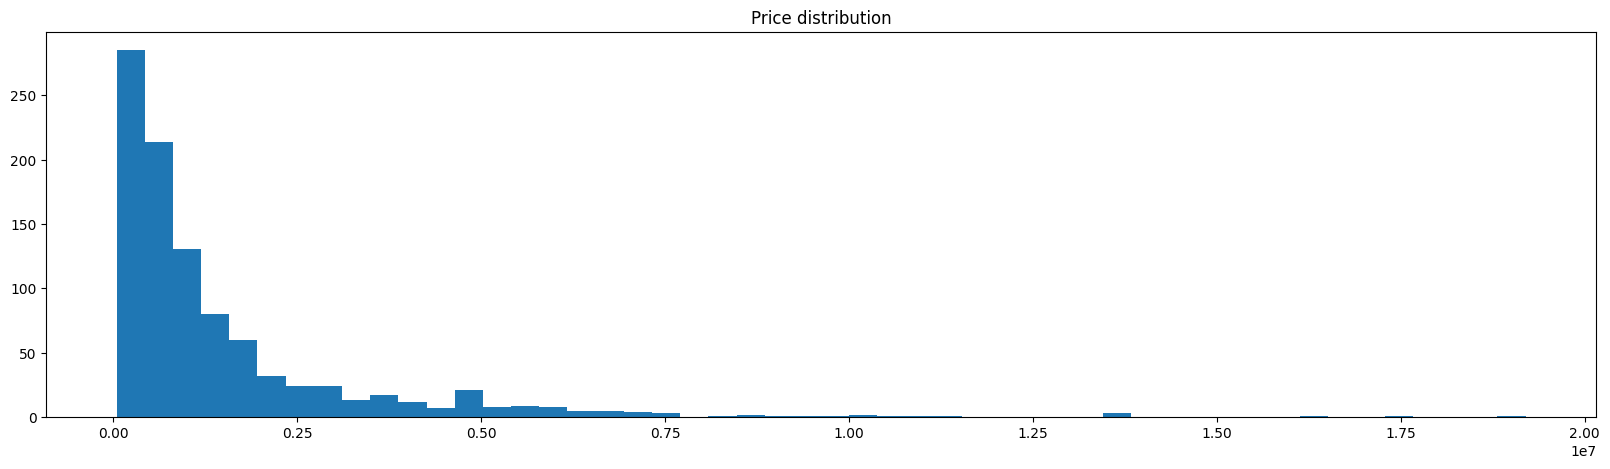

In [25]:
# Histograma de la variable "price"
plt.figure(figsize=(20, 5))
plt.hist(items["price"], bins=50)
plt.title("Price distribution")
plt.plot()

Hay unos precios muy elevados que están haciendo ruido, por lo que se va a filtrar el dataset para que solo contenga los items que no esten dentro del rango de outliers.

In [26]:
# Cálculos para un umbral de detección de outliers
q1 = items["price"].quantile(0.10)
q3 = items["price"].quantile(0.90)
iqr = q3 - q1
items = items[items["price"] <= (q3 + 1.5 * iqr)]

In [27]:
items["price"].describe()

count    9.670000e+02
mean     1.372611e+06
std      1.581100e+06
min      4.532700e+04
25%      3.599000e+05
50%      7.899000e+05
75%      1.676759e+06
max      9.307800e+06
Name: price, dtype: float64

[]

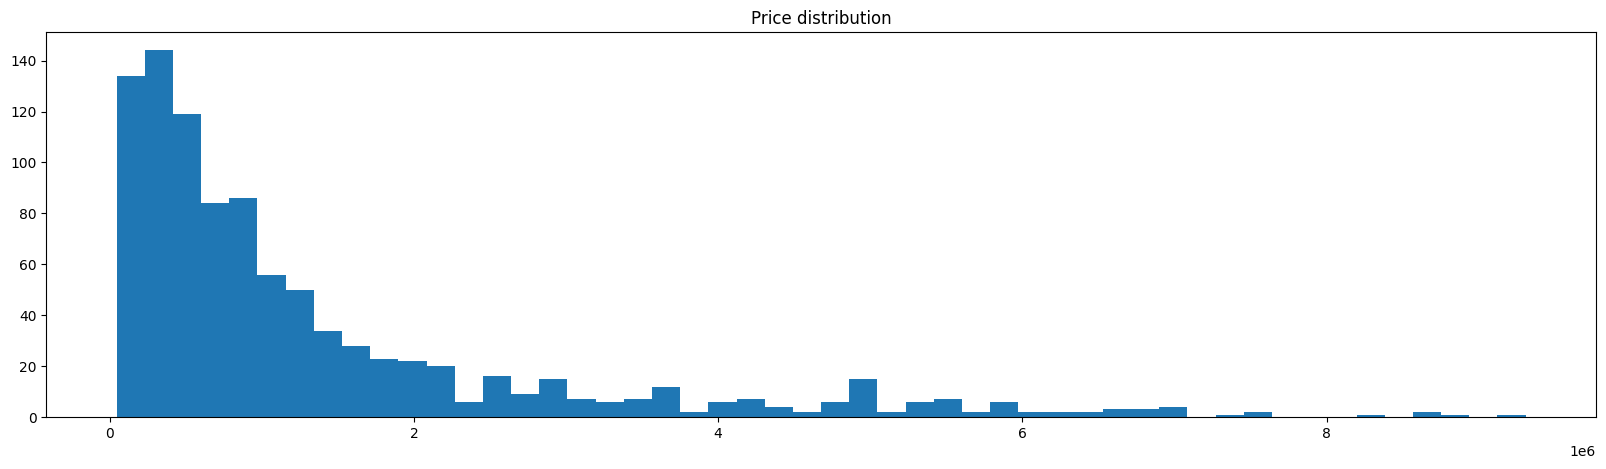

In [28]:
# Histograma de la variable "price"
plt.figure(figsize=(20, 5))
plt.hist(items["price"], bins=50)
plt.title("Price distribution")
plt.plot()

Vemos que la columna `price` tiene un valor mínimo de $45,327 (celular de gama baja) y un valor máximo de $9,307,800 COP (celular de gama muy alta, con las mejores especificaciones). El rango de precios tiene sentido, por lo que no se va a hacer ninguna transformación adicional.

##### 5. seller_address

Como se puede ver la columna `seller_address` es un json que contiene información sobre la dirección del vendedor. Vamos a visualizar el valor de esta columna para un registro.

In [29]:
pd.json_normalize(items["seller_address"][1])

,id,city.id,city.name,state.id,state.name,country.id,country.name,search_location.city.id,search_location.city.name,search_location.state.id,search_location.state.name
0,182933322,TUNPQ0tFTjQyODYy,Kennedy,CO-DC,Bogotá D.C.,CO,Colombia,TUNPQ0tFTjQyODYy,Kennedy,TUNPUEJPR1gxMDljZA,Bogotá D.C.


Nos interesa únicamente el `country_id` para saber si el vendedor está en Colombia y el `state.id` para saber si el vendedor está cerca de mi mamá. Vamos a hacer una transformación para que estas dos columnas sean más fáciles de analizar.

In [30]:
# Nos interesa únicamente el `country_id` para saber si el vendedor está en Colombia y el `search_location.city.name` para saber si el vendedor está cerca de mi mamá. Vamos a hacer una transformación para que estas dos columnas sean más fáciles de analizar.
def extract_country_id(seller_address):
    return seller_address["country"]["id"]

def extract_state_name(seller_address):
    return seller_address["state"]["id"]

items["country_id"] = items["seller_address"].apply(extract_country_id)
items["state_id"] = items["seller_address"].apply(extract_state_name)

Eliminar la columna seller_address, ya que ya no es relevante para el análisis.

In [31]:
# Eliminar columna seller_address
items.drop(["seller_address"], axis = 1, inplace=True)

In [32]:
items

,id,seller_id,currency_id,price,attributes,warranty_days,country_id,state_id
0,MCO2496457152,1757204237,COP,321887,"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",60,CN,CN-GD
1,MCO1468027022,74858296,COP,299999,"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",90,CO,CO-DC
2,MCO2312649730,224855110,COP,870000,"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",360,CO,CO-DC
3,MCO2613414884,244320949,COP,600000,"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",360,CO,CO-DC
4,MCO2162818940,1091466329,COP,349900,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",360,CO,CO-DC
...,...,...,...,...,...,...,...,...
979,MCO1609873166,19576477,COP,523200,"[{'id': 'ADDITIONAL_INFO_REQUIRED', 'name': 'I...",90,CO,CO-DC
980,MCO2350333580,1378731163,COP,207115,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",15,CN,CN-HI
981,MCO2495537346,1273773244,COP,99081,"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",60,CN,CN-ZJ
982,MCO2326357756,1059924855,COP,559900,"[{'id': 'ANATEL_HOMOLOGATION_NUMBER', 'name': ...",60,CO,CO-DC


In [33]:
items["country_id"].value_counts()

country_id
CO    859
CN    107
HK      1
Name: count, dtype: int64

Solo estamos interesados en los celulares vendidos en Colombia, por lo que vamos a filtrar el dataset para que solo contenga los items que sean vendidos en Colombia.

In [34]:
items = items[items["country_id"] == "CO"]

In [35]:
items.shape

(859, 8)

In [36]:
items["state_id"].value_counts()

state_id
CO-DC     536
CO-ANT    127
CO-CUN    108
CO-TOL     21
CO-ATL     16
CO-VAC     10
CO-SAN      9
CO-RIS      8
CO-SUC      7
CO-HUI      6
CO-COR      6
CO-CES      2
CO-CAS      2
CO-QUI      1
Name: count, dtype: int64

Todos son departamentos que existen en Colombia.

##### 6. attributes

Como se puede ver la columna `attributes` es un json que contiene información sobre la dirección del vendedor. Vamos a visualizar el valor de esta columna para un registro.

In [37]:
pd.json_normalize(items["attributes"][6])

,id,name,value_id,value_name,values,value_type
0,BATTERY_CAPACITY,Capacidad de la batería,134141,3200 mAh,"[{'id': '134141', 'name': '3200 mAh', 'struct'...",number_unit
1,BATTERY_TYPE,Tipo de batería,95013,Ion de litio,"[{'id': '95013', 'name': 'Ion de litio', 'stru...",string
2,BRAND,Marca,7561,ZTE,"[{'id': '7561', 'name': 'ZTE', 'struct': None}]",string
3,CAMERAS_MAIN_FEATURES,Características principales de las cámaras,None,"Foto HDR,Panorama,Detección de rostro,Bokeh,Be...","[{'id': '9569037', 'name': 'Foto HDR', 'struct...",string
4,CARRIER,Compañía telefónica,298335,Liberado,"[{'id': '298335', 'name': 'Liberado', 'struct'...",list
5,CHARACTERISTICS_LABEL,Etiqueta de características,10252558,886007-MLU45341663251_032021,"[{'id': '10252558', 'name': '886007-MLU4534166...",picture_id
6,CHARGE_CONNECTOR_TYPE,Tipo de conector de carga,8275366,Micro-USB,"[{'id': '8275366', 'name': 'Micro-USB', 'struc...",list
7,COLOR,Color,52014,Verde,"[{'id': '52014', 'name': 'Verde', 'struct': No...",string
8,COMPATIBLE_SIM_CARD_SIZES,Tamaños de tarjeta SIM compatibles,80453,Nano-SIM,"[{'id': '80453', 'name': 'Nano-SIM', 'struct':...",string
9,CPU_MODELS,Modelos de CPU,None,"4x1.6 GHz Cortex-A55,4x1.2 GHz Cortex-A55","[{'id': '8617059', 'name': '4x1.6 GHz Cortex-A...",string


Nos interesa únicamente el `DISPLAY_SIZE` para saber el tamaño de la pantalla del celular. Vamos a hacer una transformación para que esta columna sea más fácil de analizar. También se tomó `MODEL` pero es solo para conocer el modelo del celular una vez hecha una decisión de compra.

In [38]:
# Por cada fila queremos obtener el value_name de los id BRAND, COLOR, MODEL y WEIGHT (estos serán los nombres de las columnas)
def extract_attribute_value(attributes, attribute_id):
    for attribute in attributes:
        if attribute["id"] == attribute_id:
            return attribute["value_name"]
    return None

items["display_size"] = items["attributes"].apply(lambda x: extract_attribute_value(x, "DISPLAY_SIZE"))
items["model"] = items["attributes"].apply(lambda x: extract_attribute_value(x, "MODEL"))

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/1056768211.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items["display_size"] = items["attributes"].apply(lambda x: extract_attribute_value(x, "DISPLAY_SIZE"))
/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/1056768211.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items["model"] = items["attributes"].apply(lambda x: extract_attribute_value(x, "MODEL"))


Se puede eliminar la columna `attributes` ya que ya se extrajo la información relevante.    

In [39]:
# Eliminar columna attributes
items.drop(["attributes"], axis = 1, inplace=True)

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/3337164497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items.drop(["attributes"], axis = 1, inplace=True)


In [40]:
items["display_size"].value_counts(dropna=False, normalize=True)

display_size
None             0.251455
6.5 "            0.091967
6.67 "           0.075669
6.7 "            0.068685
6.6 "            0.060536
6.1 "            0.040745
6.8 "            0.037253
6.78 "           0.034924
6.4 "            0.019790
6.56 "           0.019790
2.4 "            0.018626
0.168 m          0.017462
5 "              0.017462
6.55 "           0.016298
6.74 "           0.013970
6.43 "           0.011641
6 "              0.011641
5.5 "            0.011641
6.79 "           0.009313
6.71 "           0.008149
6.58 "           0.008149
6.72 "           0.006985
5.8 "            0.006985
6.9 "            0.006985
4.7 "            0.006985
6.2 "            0.005821
0.172 m          0.005821
6.53 "           0.005821
1.8 "            0.005821
1.77 "           0.004657
6.52 "           0.004657
5.4 "            0.003492
1.47 "           0.003492
0.166 m          0.003492
6.73 "           0.003492
0.046 m          0.003492
0.165 m          0.003492
0.167 m          0.003492

In [41]:
# Convertir la columna size a int y que todo esté en pulgadas
def convert_size_to_inches(size):
    if size is None:
        return None

    parts = size.split(" ")
    num = float(parts[0])
    unit = parts[1]

    if unit == "\"" or unit == "pulgadas" or unit == "in":
        return int(num)
    elif unit == "m":
        return int(num * 39.3701)
    elif unit == "cm":
        return int(num * 0.393701)
    else:
        return None

items["display_size"] = items["display_size"].apply(convert_size_to_inches)

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/420812702.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items["display_size"] = items["display_size"].apply(convert_size_to_inches)


In [42]:
items["display_size"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    643.000000
mean       5.650078
std        1.059203
min        1.000000
5%         2.000000
25%        6.000000
50%        6.000000
75%        6.000000
95%        6.000000
max        7.000000
Name: display_size, dtype: float64

#### Archivo `sellers.json`

In [43]:
sellers.head()

,id,seller_reputation
0,1305122305,"{'level_id': '5_green', 'power_seller_status':..."
1,819549189,"{'level_id': '5_green', 'power_seller_status':..."
2,582439941,"{'level_id': '5_green', 'power_seller_status':..."
3,738767370,"{'level_id': '5_green', 'power_seller_status':..."
4,224086027,"{'level_id': '5_green', 'power_seller_status':..."


In [44]:
sellers.shape

(212, 2)

In [45]:
sellers.isna().sum()

id                   0
seller_reputation    0
dtype: int64

In [46]:
# Miremos los tipos de datos
sellers.dtypes

id                    int64
seller_reputation    object
dtype: object

##### 1. id

In [47]:
# El id debería ser de tipo object, por lo que lo convertimos
sellers["id"] = sellers["id"].astype("object")

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/2223423024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellers["id"] = sellers["id"].astype("object")


In [48]:
# Miramos cuantos id's únicos hay, lo que nos da una noción de si hay duplicados
sellers["id"].nunique()

212

##### 2. seller_reputation

Como se puede ver la columna `seller_reputation` es un json que contiene información sobre la reputación del vendedor. Vamos a visualizar el valor de esta columna para un registro.

In [49]:
pd.json_normalize(sellers["seller_reputation"][0])

,level_id,power_seller_status,transactions.period,transactions.total
0,5_green,None,historic,1712


Solo nos interesa la columna `level_id` para saber la calificación del vendedor y si es un vendedor verde. Vamos a hacer una transformación para que esta columna sea más fácil de analizar.

In [50]:
sellers["level_id"] = sellers["seller_reputation"].apply(lambda x: x["level_id"])

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/517076756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellers["level_id"] = sellers["seller_reputation"].apply(lambda x: x["level_id"])


In [51]:
sellers["level_id"].value_counts()

level_id
5_green          184
4_light_green     17
3_yellow           7
Name: count, dtype: int64

Ya no necesitamos la columna `seller_reputation`, por lo que la vamos a eliminar.

In [52]:
sellers.drop(["seller_reputation"], axis = 1, inplace=True)

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/88378994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellers.drop(["seller_reputation"], axis = 1, inplace=True)


##### Datos nulos

In [53]:
sellers.isna().sum()

id          0
level_id    4
dtype: int64

No eliminaremos por el momento los registros de los vendedores de los cuales no tenemos su reputación, ya que luego no sabemos cuáles son los productos que estos venden. Eliminaremos más adelante los vendedores, junto con sus productos.

#### Archivo `search_results.json`

In [54]:
search_results.head()

,id,attributes,official_store_name,shipping
0,MCO2429633128,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",NaN,"{'store_pick_up': False, 'free_shipping': True..."
1,MCO1388200741,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",NaN,"{'store_pick_up': False, 'free_shipping': True..."
2,MCO2325852928,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",NaN,"{'store_pick_up': False, 'free_shipping': True..."
3,MCO1473059645,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",NaN,"{'store_pick_up': False, 'free_shipping': True..."
4,MCO2208945346,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",NaN,"{'store_pick_up': False, 'free_shipping': True..."


In [55]:
search_results.shape

(984, 4)

In [56]:
search_results.isna().sum()

id                       0
attributes               0
official_store_name    899
shipping                 0
dtype: int64

In [57]:
search_results.dtypes

id                     object
attributes             object
official_store_name    object
shipping               object
dtype: object

In [58]:
# Miramos cuantos id's únicos hay, lo que nos da una noción de si hay duplicados
search_results["id"].nunique()

984

##### 1. attributes

Como se puede ver la columna `attributes` es un json que contiene información sobre el celular. Vamos a visualizar el valor de esta columna para un registro.

In [59]:
pd.json_normalize(search_results["attributes"][0])

,id,name,value_id,value_name,attribute_group_id,attribute_group_name,value_struct,values,source,value_type,value_struct.number,value_struct.unit
0,BRAND,Marca,59387,Xiaomi,OTHERS,Otros,NaN,"[{'id': '59387', 'name': 'Xiaomi', 'struct': N...",1,string,NaN,NaN
1,COLOR,Color,52049,Negro,OTHERS,Otros,NaN,"[{'id': '52049', 'name': 'Negro', 'struct': No...",1,string,NaN,NaN
2,DETAILED_MODEL,Modelo detallado,13261884,8 GB,OTHERS,Otros,NaN,"[{'id': '13261884', 'name': '8 GB', 'struct': ...",1,string,NaN,NaN
3,GPU_MODEL,Modelo de GPU,7671213,Adreno 610,OTHERS,Otros,NaN,"[{'id': '7671213', 'name': 'Adreno 610', 'stru...",1,string,NaN,NaN
4,GTIN,Código universal de producto,None,6941812759530,OTHERS,Otros,NaN,"[{'id': None, 'name': '6941812759530', 'struct...",6402814585011704,string,NaN,NaN
5,ITEM_CONDITION,Condición del ítem,2230284,Nuevo,OTHERS,Otros,NaN,"[{'id': '2230284', 'name': 'Nuevo', 'struct': ...",6402814585011704,list,NaN,NaN
6,LINE,Línea,199791,Redmi,OTHERS,Otros,NaN,"[{'id': '199791', 'name': 'Redmi', 'struct': N...",1,string,NaN,NaN
7,MAIN_COLOR,Color principal,2450295,Negro,OTHERS,Otros,NaN,"[{'id': '2450295', 'name': 'Negro', 'struct': ...",1,list,NaN,NaN
8,MODEL,Modelo,29566197,Note 13 4G,OTHERS,Otros,NaN,"[{'id': '29566197', 'name': 'Note 13 4G', 'str...",1,string,NaN,NaN
9,PACKAGE_LENGTH,Largo del paquete,None,18 cm,OTHERS,Otros,NaN,"[{'id': None, 'name': '18 cm', 'struct': {'num...",4333789534002961,number_unit,18.0,cm


Como solo nos interesa la marca, el color, el modelo y el tamaño/peso aproximado del celular, vamos a tomar únicamente los valores: BRAND, COLOR y WEIGHT.

In [60]:
# Por cada fila queremos obtener el value_name de los id BRAND, COLOR y WEIGHT (estos serán los nombres de las columnas)
def extract_attribute_value(attributes, attribute_id):
    for attribute in attributes:
        if attribute["id"] == attribute_id:
            return attribute["value_name"]
    return None

search_results["brand"] = search_results["attributes"].apply(lambda x: extract_attribute_value(x, "BRAND"))
search_results["color"] = search_results["attributes"].apply(lambda x: extract_attribute_value(x, "MAIN_COLOR"))
search_results["weight"] = search_results["attributes"].apply(lambda x: extract_attribute_value(x, "WEIGHT"))

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/1420116820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_results["brand"] = search_results["attributes"].apply(lambda x: extract_attribute_value(x, "BRAND"))
/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/1420116820.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_results["color"] = search_results["attributes"].apply(lambda x: extract_attribute_value(x, "MAIN_COLOR"))
/var/folders/r5/cc3y743j5ys_g9v6b67

Eliminamos la columna `attributes`, ya que ya no es relevante para el análisis.

In [61]:
# Eliminar columna attributes
search_results.drop(["attributes"], axis = 1, inplace=True)

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/3363330316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_results.drop(["attributes"], axis = 1, inplace=True)


In [62]:
search_results

,id,official_store_name,shipping,brand,color,weight
0,MCO2429633128,NaN,"{'store_pick_up': False, 'free_shipping': True...",Xiaomi,Negro,188.5 g
1,MCO1388200741,NaN,"{'store_pick_up': False, 'free_shipping': True...",Xiaomi,Negro,1 kg
2,MCO2325852928,NaN,"{'store_pick_up': False, 'free_shipping': True...",Samsung,Celeste,213 g
3,MCO1473059645,NaN,"{'store_pick_up': False, 'free_shipping': True...",Xiaomi,Verde,192 g
4,MCO2208945346,NaN,"{'store_pick_up': False, 'free_shipping': True...",Samsung,Blanco,233 g
...,...,...,...,...,...,...
979,MCO939025953,NaN,"{'store_pick_up': False, 'free_shipping': True...",Apple,None,226 g
980,MCO2600594740,NaN,"{'store_pick_up': False, 'free_shipping': Fals...",Samsung,None,186 g
981,MCO1410385883,NaN,"{'store_pick_up': False, 'free_shipping': True...",Apple,None,143 g
982,MCO2236800216,NaN,"{'store_pick_up': False, 'free_shipping': Fals...",Apple,None,240 g


Como se puede ver la columna `weight` hay que limpiarla para que solo tenga una unidad (idealmente en este caso gramos), y que sea de tipo `int`.

In [63]:
search_results["weight"].unique()

array(['188.5 g', '1 kg', '213 g', '192 g', '233 g', '288 g', '209 g',
       '232 g', '171 g', '221 g', '187 g', '197 g', '200 g', '185 g',
       '181 g', None, '173 g', '0.199 kg', '179 g', '624 g', '199 g',
       '195 g', '175 g', '190 g', '208 g', '177 g', '80.1 g', '193 g',
       '188 g', '229.5 g', '196 g', '134 g', '94.5 g', '170 g', '75 g',
       '167 g', '178.8 g', '210.5 g', '177.2 g', '202 g', '193.5 g',
       '168 g', '155 g', '174 g', '183.5 g', '0.19 kg', '212 g',
       '174.89 g', '194 g', '186 g', '122 g', '0.143 kg', '84.5 g',
       '198 g', '205 g', '169 g', '80.2 g', '204.2 g', '203 g', '172 g',
       '157 g', '228 g', '166.8 g', '144 g', '182 g', '184.25 g', '201 g',
       '0.208 kg', '163 g', '220 g', '130 g', '189 g', '0.179 kg',
       '189.5 g', '0.188 kg', '146 g', '183.45 g', '178 g', '324 g',
       '300 g', '0.026 kg', '203.5 g', '647 g', '0.173 kg', '163.84 g',
       '207 g', '184 g', '180 g', '211 g', '158 g', '188.9 g', '390 g',
       '90.3 g',

In [64]:
# Convertir la columna weight a int y que todo esté en gramos
def convert_weight_to_grams(weight):
    if weight is None:
        return None

    parts = weight.split(" ")
    num = float(parts[0])
    unit = parts[1]

    if unit == "kg":
        return int(num * 1000)
    elif unit == "g":
        return int(num)
    elif unit == "lb":
        return int(num * 453.592)
    else:
        return None

search_results["weight"] = search_results["weight"].apply(convert_weight_to_grams)

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/2611184530.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_results["weight"] = search_results["weight"].apply(convert_weight_to_grams)


In [65]:
search_results["weight"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count     580.000000
mean      207.924138
std       110.074858
min        26.000000
5%        134.000000
25%       177.000000
50%       190.000000
75%       205.000000
95%       300.150000
max      1000.000000
Name: weight, dtype: float64

Se notan outliers en la columna `weight` que no tienen sentido, por lo que se va a filtrar el dataset para que solo contenga los items que no esten dentro del rango de outliers (Esto se hará más adelante).

In [66]:
search_results["color"].value_counts()

color
Negro             175
Azul               59
Verde              30
Gris               23
Blanco             21
Dorado             15
Violeta            12
Celeste            11
Plateado            8
Crema               6
Gris oscuro         3
Azul oscuro         3
Verde claro         3
Azul claro          3
Lila                2
Rojo                2
Amarillo            2
Rosa                2
Verde oscuro        2
Naranja oscuro      1
Naranja             1
Coral               1
Verde limón         1
Beige               1
Naranja claro       1
Coral oscuro        1
Name: count, dtype: int64

Unificar colores, es decir, Naranja oscuro, Naranja claro y Naranja son todos Naranja. 

In [67]:
# Unificar colores
def unify_colors(color):
    if color == "None" or color is None:
        return None

    colores = color.split(" ")
    if len(colores) > 1:
        return colores[0]
    else:
        return color
    
search_results["color"] = search_results["color"].apply(unify_colors)

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/4190613792.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_results["color"] = search_results["color"].apply(unify_colors)


In [68]:
search_results["color"].value_counts(normalize=True)

color
Negro       0.449871
Azul        0.167095
Verde       0.092545
Gris        0.066838
Blanco      0.053985
Dorado      0.038560
Violeta     0.030848
Celeste     0.028278
Plateado    0.020566
Crema       0.015424
Naranja     0.007712
Rosa        0.005141
Amarillo    0.005141
Coral       0.005141
Rojo        0.005141
Lila        0.005141
Beige       0.002571
Name: proportion, dtype: float64

In [69]:
search_results["brand"].value_counts() 

brand
Xiaomi                                                                                                                 152
Samsung                                                                                                                128
Motorola                                                                                                                97
Apple                                                                                                                   71
Tecno                                                                                                                   62
Generic                                                                                                                 47
ZTE                                                                                                                     41
Infinix                                                                                                                 32
Oppo      

Más adelante (luego de unir todos los datos en un solo dataframe), nos quedaremos solo con las marcas que cubran el 90% de los datos. Hay demasiadas marcas.

##### 2. shipping

Como se puede ver la columna `shipping` es un json que contiene información del shipping del celular. Vamos a visualizar el valor de esta columna para un registro.

In [70]:
pd.json_normalize(search_results["shipping"][0])

,store_pick_up,free_shipping,logistic_type,mode,tags,benefits,promise,shipping_score
0,False,True,cross_docking,me2,"[fbm_in_process, mandatory_free_shipping]",None,None,-1


Nos interesa únicamente el `free_shipping` para saber si el vendedor ofrece envío gratis. Vamos a hacer una transformación para que esta columna sea más fácil de analizar.

In [71]:
# Solo nos interesa el `free_shipping` para saber si el envío es gratis
search_results["free_shipping"] = search_results["shipping"].apply(lambda x: x["free_shipping"])

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/3746677313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_results["free_shipping"] = search_results["shipping"].apply(lambda x: x["free_shipping"])


In [72]:
search_results["free_shipping"].value_counts()

free_shipping
True     978
False      6
Name: count, dtype: int64

Eliminamos la columna `shipping`, ya que ya no es relevante para el análisis.

In [73]:
# Eliminar columna shipping
search_results.drop(["shipping"], axis = 1, inplace=True)

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/3487840231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_results.drop(["shipping"], axis = 1, inplace=True)


In [74]:
search_results

,id,official_store_name,brand,color,weight,free_shipping
0,MCO2429633128,NaN,Xiaomi,Negro,188.0,True
1,MCO1388200741,NaN,Xiaomi,Negro,1000.0,True
2,MCO2325852928,NaN,Samsung,Celeste,213.0,True
3,MCO1473059645,NaN,Xiaomi,Verde,192.0,True
4,MCO2208945346,NaN,Samsung,Blanco,233.0,True
...,...,...,...,...,...,...
979,MCO939025953,NaN,Apple,None,226.0,True
980,MCO2600594740,NaN,Samsung,None,186.0,False
981,MCO1410385883,NaN,Apple,None,143.0,True
982,MCO2236800216,NaN,Apple,None,240.0,False


##### 3. official_store_name

In [75]:
search_results["official_store_name"].value_counts()

official_store_name
Motorola               15
Samsung                12
Teknopolis             12
Xiaomi                  8
Ktienda                 7
REFURBI                 7
Smart Buy               5
Comprandoando           4
Apple                   3
Krono                   3
Kalley                  3
Electro Online          2
Ulefone                 1
UNIHERTZ                1
TCL                     1
PR aPreciosdeRemate     1
Name: count, dtype: int64

Un valor de NaN en la columna `official_store_name` significa muy probablemente que el item no es de una tienda oficial. Por lo que vamos a reemplazar los valores NaN por "No es tienda oficial".

In [76]:
# Cambiar NaN de official_store_name por "No official store"
search_results["official_store_name"] = search_results["official_store_name"].fillna("No official store")

/var/folders/r5/cc3y743j5ys_g9v6b67d72jh0000gn/T/ipykernel_46321/1657221077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_results["official_store_name"] = search_results["official_store_name"].fillna("No official store")


#### Dataframe consolidado

In [77]:
sellers = sellers.rename(columns={"id": "seller_id"})

In [78]:
df = items.merge(sellers, on="seller_id", how="left")

In [79]:
df = df.merge(search_results, on="id", how="left")

In [80]:
df

,id,seller_id,currency_id,price,warranty_days,country_id,state_id,display_size,model,level_id,official_store_name,brand,color,weight,free_shipping
0,MCO1468027022,74858296,COP,299999,90,CO,CO-DC,NaN,J15,5_green,No official store,tecnology,None,NaN,True
1,MCO2312649730,224855110,COP,870000,360,CO,CO-DC,NaN,camon 30,5_green,No official store,Tecno,None,NaN,True
2,MCO2613414884,244320949,COP,600000,360,CO,CO-DC,NaN,Smart 8 Pro,5_green,No official store,Infinix,Negro,NaN,True
3,MCO2162818940,1091466329,COP,349900,360,CO,CO-DC,NaN,Go 2024,5_green,No official store,Tecno,None,NaN,True
4,MCO2602949080,1536284902,COP,219900,360,CO,CO-CUN,6.0,A5 2020 Dual SIM,5_green,No official store,ZTE,Verde,155.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,MCO1457449153,1790854165,COP,699900,60,CO,CO-DC,6.0,REDMI 12,5_green,No official store,Xiaomi,Negro,198.0,True
855,MCO1472332801,687605437,COP,1266000,0,CO,CO-VAC,6.0,A35,5_green,No official store,Samsung,None,209.0,True
856,MCO1609873166,19576477,COP,523200,90,CO,CO-DC,6.0,Note 11 (Snapdragon),5_green,No official store,Xiaomi,Gris,179.0,True
857,MCO2326357756,1059924855,COP,559900,60,CO,CO-DC,6.0,G54 5G (eSIM),5_green,No official store,Motorola,Verde,174.0,True


In [81]:
# Miramos si hay valores nulos
df.isna().sum()

id                       0
seller_id                0
currency_id              0
price                    0
warranty_days            0
country_id               0
state_id                 0
display_size           216
model                    0
level_id                 2
official_store_name      0
brand                    0
color                  490
weight                 332
free_shipping            0
dtype: int64

In [82]:
# Se eliminan las filas con valores nulos
df.dropna(inplace=True)

In [83]:
df.isna().sum()

id                     0
seller_id              0
currency_id            0
price                  0
warranty_days          0
country_id             0
state_id               0
display_size           0
model                  0
level_id               0
official_store_name    0
brand                  0
color                  0
weight                 0
free_shipping          0
dtype: int64

In [84]:
df["weight"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count     286.000000
mean      203.279720
std       110.766098
min        75.000000
5%        143.000000
25%       179.000000
50%       190.000000
75%       200.000000
95%       238.000000
max      1000.000000
Name: weight, dtype: float64

Se puede ver que hay outliers en la columna `weight`, por lo que vamos a filtrar el dataset para que solo contenga los items que no esten dentro del rango de outliers.

In [85]:
# Eliminar outliers de weight
q1 = df["weight"].quantile(0.05)
q3 = df["weight"].quantile(0.95)
iqr = q3 - q1
df = df[df["weight"] <= (q3 + 1.5 * iqr)]

In [86]:
df["weight"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    281.000000
mean     189.103203
std       30.845931
min       75.000000
5%       143.000000
25%      179.000000
50%      190.000000
75%      199.000000
95%      232.000000
max      324.000000
Name: weight, dtype: float64

In [87]:
df["brand"].value_counts()

brand
Samsung     61
Xiaomi      52
Motorola    30
Apple       17
ZTE         14
Oppo        14
Honor       12
Realme      11
Google      10
Alcatel      9
Nokia        8
Infinix      8
Vivo         7
Tecno        5
Huawei       5
Ulefone      3
TCL          3
OnePlus      2
Nothing      2
Nubia        2
BLU          1
Oukitel      1
Kalley       1
Rokit        1
Doogee       1
Sony         1
Name: count, dtype: int64

Tomaremos solo las marcas de celulares que cubran el 90% de los datos; de manera que, las marcas que se tengan en cuenta son las más conocidas y vendidas en Colombia. Y por tanto, las marcas más confiables.

In [88]:
# Tomar los datos con solo las macras que cubran el 95% de los datos
brand_frec_cumsum = df["brand"].value_counts(normalize=True).cumsum()
brand_frec_cumsum

brands_to_keep = list(brand_frec_cumsum[brand_frec_cumsum <= 0.95].index)
df = df[df["brand"].isin(brands_to_keep)]
df["brand"].value_counts(normalize=True)

brand
Samsung     0.229323
Xiaomi      0.195489
Motorola    0.112782
Apple       0.063910
ZTE         0.052632
Oppo        0.052632
Honor       0.045113
Realme      0.041353
Google      0.037594
Alcatel     0.033835
Nokia       0.030075
Infinix     0.030075
Vivo        0.026316
Tecno       0.018797
Huawei      0.018797
Ulefone     0.011278
Name: proportion, dtype: float64

In [89]:
df.shape

(266, 15)

In [90]:
df.head()

,id,seller_id,currency_id,price,warranty_days,country_id,state_id,display_size,model,level_id,official_store_name,brand,color,weight,free_shipping
4,MCO2602949080,1536284902,COP,219900,360,CO,CO-CUN,6.0,A5 2020 Dual SIM,5_green,No official store,ZTE,Verde,155.0,True
6,MCO1331956853,138449369,COP,685900,360,CO,CO-ANT,6.0,C55,5_green,No official store,Realme,Negro,189.0,True
11,MCO2263793320,476229825,COP,519920,0,CO,CO-DC,6.0,A03,5_green,No official store,Samsung,Azul,196.0,True
13,MCO1480703565,44664184,COP,5300000,360,CO,CO-DC,6.0,Razr 50 Ultra (eSIM),5_green,No official store,Motorola,Azul,189.0,True
14,MCO1421298123,244067605,COP,429900,180,CO,CO-ANT,6.0,G14,5_green,No official store,Motorola,Lila,177.0,True


In [91]:
df.duplicated().sum()

0

In [92]:
df.isna().sum()

id                     0
seller_id              0
currency_id            0
price                  0
warranty_days          0
country_id             0
state_id               0
display_size           0
model                  0
level_id               0
official_store_name    0
brand                  0
color                  0
weight                 0
free_shipping          0
dtype: int64

Luego de un proceso de limpieza y transformación de los datos, se obtiene un dataset que:
- Cumple con el requisito de completitud, ya que no hay valores nulos en las columnas relevantes.
- Cumple con el requisito de consistencia, ya que los datos están en el formato correcto y no hay duplicados.
- Los datos están dentro de los rangos esperados y tienen valores con sentido.


### Diagrama de bloques que evidencie los diferentes procesos de limpieza y preparación de datos implementados

![](https://github.com/Cata1406/Parcial1-CDA/blob/main/Diagrama_de_limpieza_y_preparacion_de_datos.png?raw=true)

## Punto 2: Análisis exploratorio de las columnas escogidas

### Análisis univariado

#### 1. price

In [94]:
df["price"].describe(percentiles=[0.05, 0.25, 0.5, 0.65, 0.75, 0.95])

count    2.660000e+02
mean     1.509359e+06
std      1.639141e+06
min      9.979900e+04
5%       1.809250e+05
25%      4.739000e+05
50%      7.944820e+05
65%      1.199224e+06
75%      1.897400e+06
95%      5.412188e+06
max      7.498750e+06
Name: price, dtype: float64

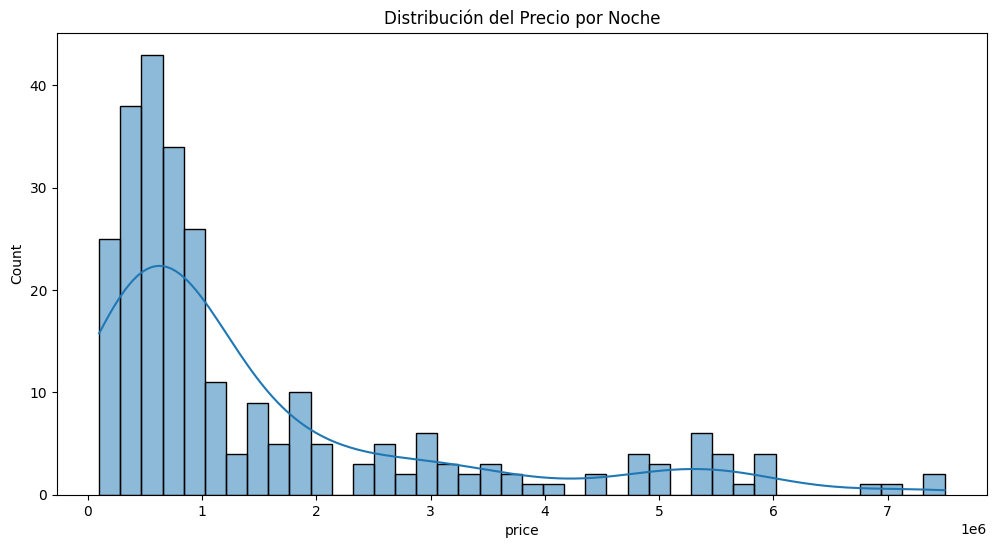

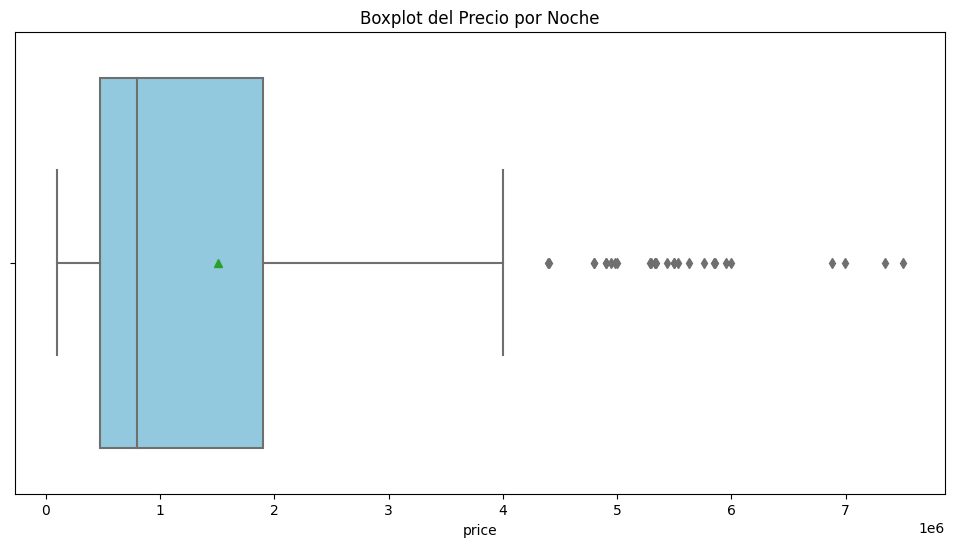

In [95]:
# Histograma de la variable "price"
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True, bins=40)
plt.title('Distribución del Precio por Noche')
plt.show()

# Boxplot de la distribucion para cada variable numerica horizontal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='price', color='skyblue', showmeans=True, orient='h')
plt.title('Boxplot del Precio por Noche')
plt.show()


**Insight**
- 50% de los celulares tienen un precio menor a $794,482 COP (lo que esta dentro del rango de precio aceptable). El precio mínimo es de $45,327 COP y el precio máximo es de $9,307,800 COP.
- El 65% de los celulares tienen un precio menor a $1,199,224 COP

#### 2. warranty_days

In [96]:
df["warranty_days"].describe(percentiles=[0.05, 0.25, 0.32, 0.5, 0.75, 0.95])

count    266.000000
mean     250.285714
std      150.101982
min        0.000000
5%         3.000000
25%       90.000000
32%      180.000000
50%      360.000000
75%      360.000000
95%      360.000000
max      720.000000
Name: warranty_days, dtype: float64

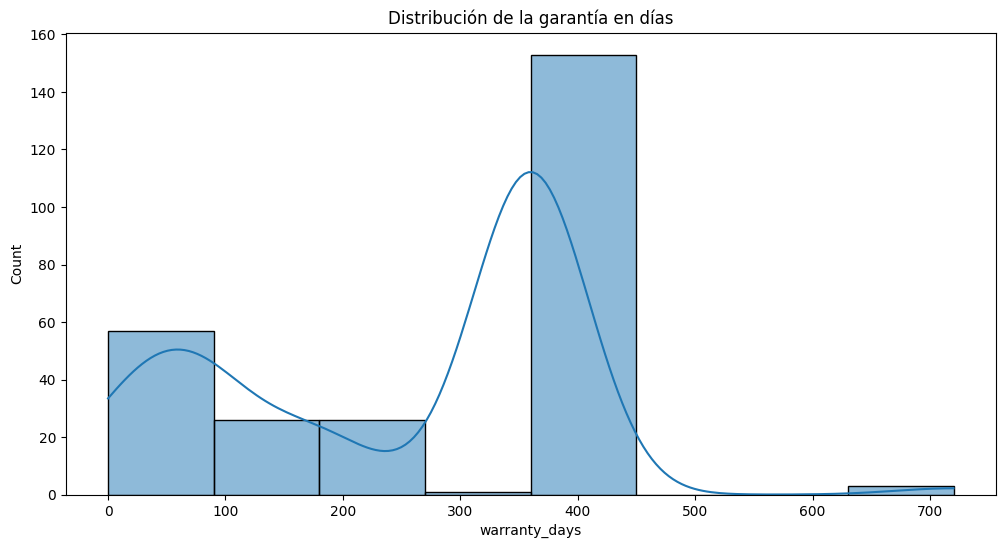

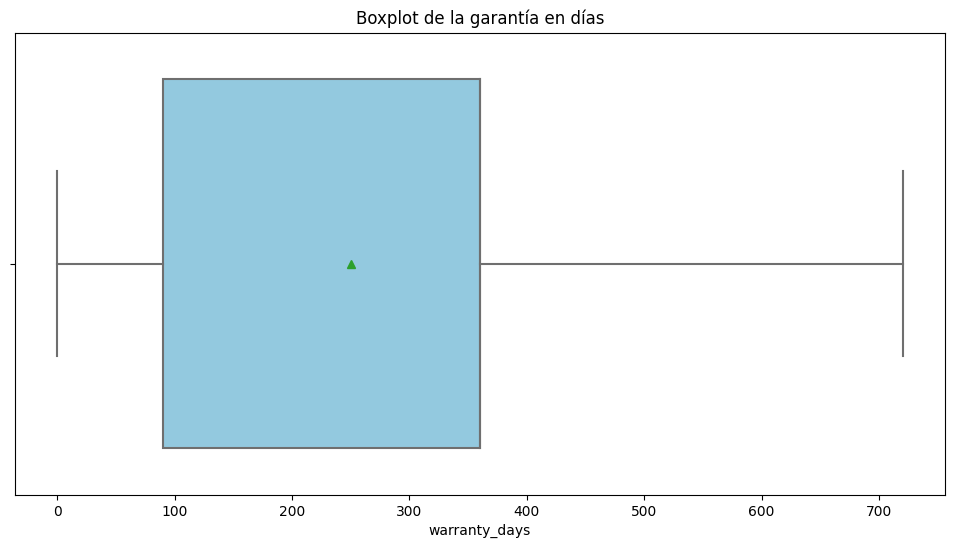

In [97]:
# Histograma de la variable "price"
plt.figure(figsize=(12, 6))
sns.histplot(df['warranty_days'], kde=True, bins=8)
plt.title('Distribución de la garantía en días')
plt.show()

# Boxplot de la distribucion para cada variable numerica horizontal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='warranty_days', color='skyblue', showmeans=True, orient='h')
plt.title('Boxplot de la garantía en días')
plt.show()

**Insights**
- El 68% de los celulares tienen 6 meses o más de garantía (restar 100% con 32%).

#### 3. state_id

In [98]:
df['state_id'].value_counts(dropna=False, normalize=True)

state_id
CO-DC     0.533835
CO-ANT    0.199248
CO-CUN    0.142857
CO-TOL    0.030075
CO-SAN    0.018797
CO-HUI    0.015038
CO-VAC    0.015038
CO-COR    0.015038
CO-ATL    0.011278
CO-RIS    0.011278
CO-CES    0.003759
CO-CAS    0.003759
Name: proportion, dtype: float64

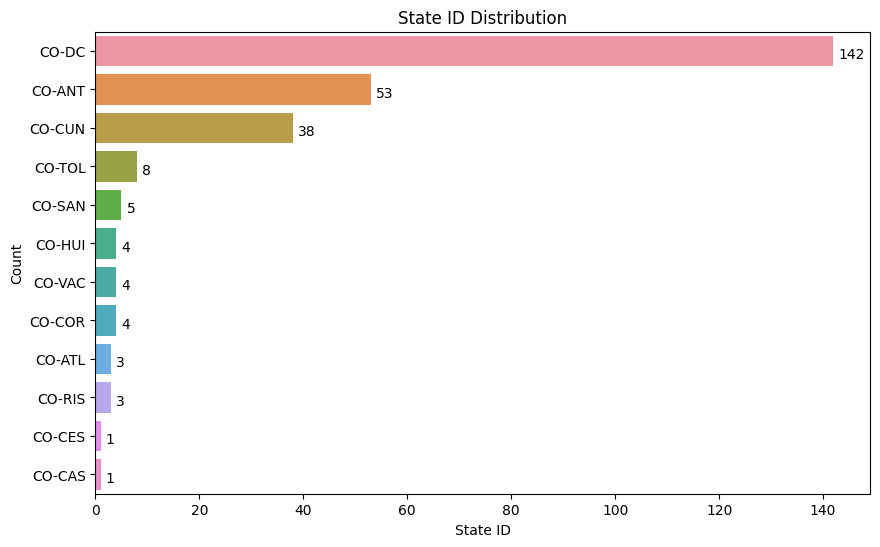

In [99]:
# PLOT ROOM TYPE DISTRIBUTION IN THE DATASET 
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='state_id', order=df['state_id'].value_counts().index)
plt.title('State ID Distribution')
plt.xlabel('State ID')
plt.ylabel('Count')

# Add value labels to the bars

for p in ax.patches:
    #ax = plt.gca()

    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 1, p.get_y() + 0.5), ha='left', va='center')

plt.show()

**Insights**
- La mayoría de los celulares se encuentran en regiones centrales del país (DC, ANT, CUN), desde las cuales usualmente no demora mucho el envío (2-3 días).

#### 4. level_id

In [100]:
df['level_id'].value_counts(dropna=False, normalize=True)

level_id
5_green          0.977444
4_light_green    0.018797
3_yellow         0.003759
Name: proportion, dtype: float64

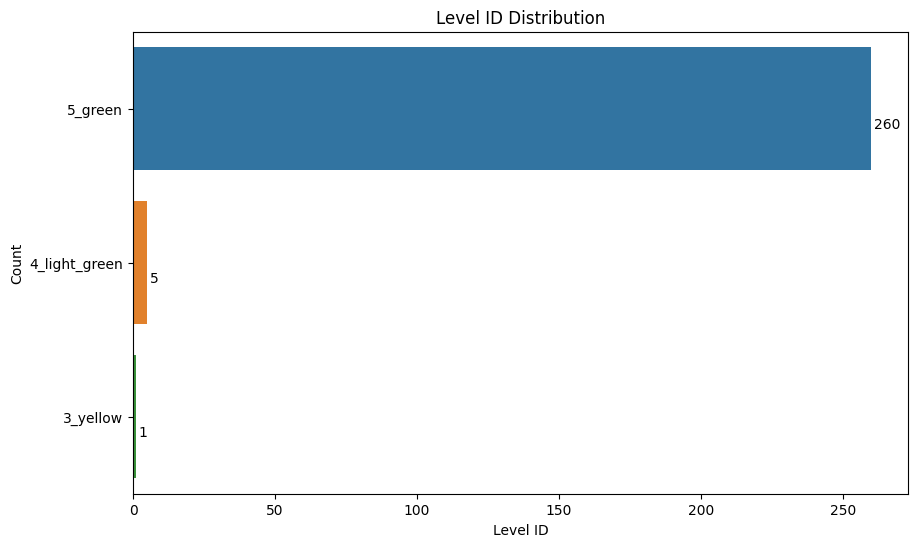

In [101]:
# PLOT ROOM TYPE DISTRIBUTION IN THE DATASET 
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='level_id', order=df['level_id'].value_counts().index)
plt.title('Level ID Distribution')
plt.xlabel('Level ID')
plt.ylabel('Count')

# Add value labels to the bars

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 1, p.get_y() + 0.5), ha='left', va='center')

plt.show()

**Insights**
- Casi todos los vendedoros son verdes y tienen muy buena reputación

#### 5. official_store_name

In [102]:
df['official_store_name'].value_counts(dropna=False, normalize=True)

official_store_name
No official store    0.928571
Xiaomi               0.022556
Teknopolis           0.018797
Smart Buy            0.011278
Samsung              0.007519
Electro Online       0.003759
Ktienda              0.003759
Motorola             0.003759
Name: proportion, dtype: float64

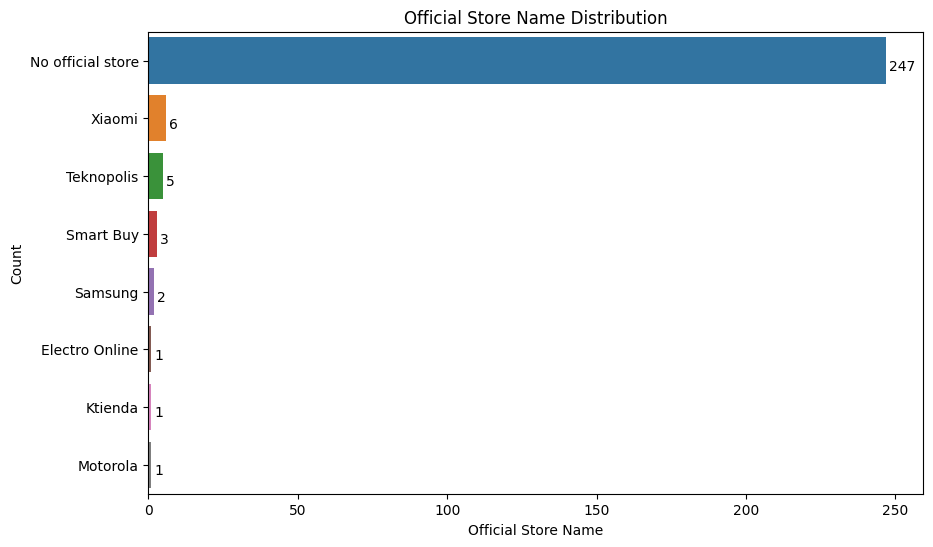

In [103]:
# PLOT ROOM TYPE DISTRIBUTION IN THE DATASET 
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='official_store_name', order=df['official_store_name'].value_counts().index)
plt.title('Official Store Name Distribution')
plt.xlabel('Official Store Name')
plt.ylabel('Count')

# Add value labels to the bars

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 1, p.get_y() + 0.5), ha='left', va='center')

plt.show()

**Insights**
- Casi ningún celular es vendido por la tienda oficial
- Será mejor basarse por la reputación del vendedor, la marca del celular y la garantía para tomar una decisión de compra

#### 6. brand

In [104]:
df['brand'].value_counts(dropna=False, normalize=True)

brand
Samsung     0.229323
Xiaomi      0.195489
Motorola    0.112782
Apple       0.063910
ZTE         0.052632
Oppo        0.052632
Honor       0.045113
Realme      0.041353
Google      0.037594
Alcatel     0.033835
Nokia       0.030075
Infinix     0.030075
Vivo        0.026316
Tecno       0.018797
Huawei      0.018797
Ulefone     0.011278
Name: proportion, dtype: float64

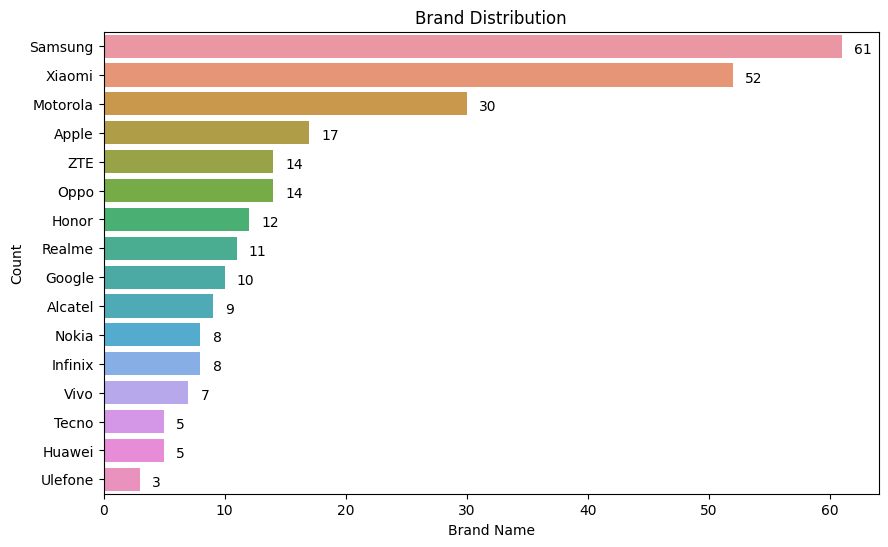

In [105]:
# PLOT ROOM TYPE DISTRIBUTION IN THE DATASET 
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='brand', order=df['brand'].value_counts().index)
plt.title('Brand Distribution')
plt.xlabel('Brand Name')
plt.ylabel('Count')

# Add value labels to the bars

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 1, p.get_y() + 0.5), ha='left', va='center')

plt.show()

**Insights**
- Hay variedad de marcas en Mercado Libre, pero las más comunes son Samsung, Apple, Xiaomi y Motorola (todas marcas muy conocidas y confiables).

#### 7. color

In [106]:
df['color'].value_counts(dropna=False, normalize=True)

color
Negro       0.424812
Azul        0.172932
Verde       0.105263
Gris        0.071429
Blanco      0.041353
Celeste     0.037594
Violeta     0.033835
Dorado      0.030075
Plateado    0.022556
Crema       0.022556
Rosa        0.007519
Rojo        0.007519
Lila        0.007519
Beige       0.003759
Coral       0.003759
Naranja     0.003759
Amarillo    0.003759
Name: proportion, dtype: float64

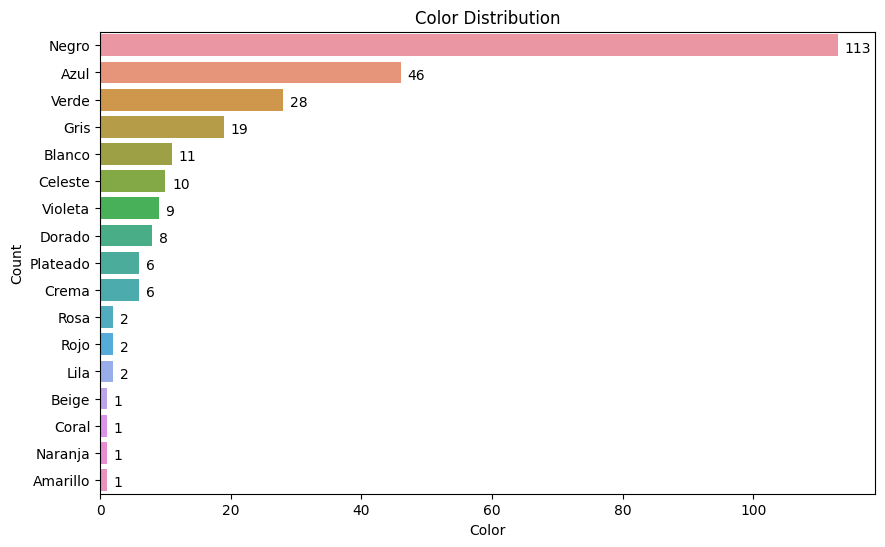

In [107]:
# PLOT ROOM TYPE DISTRIBUTION IN THE DATASET 
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='color', order=df['color'].value_counts().index)
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')

# Add value labels to the bars

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 1, p.get_y() + 0.5), ha='left', va='center')

plt.show()

**Insights**
- Se puede ver que hay una variedad de colores en los celulares, pero los más comunes son el negro, azul, verde y gris.
- Celulares menos comunes son los de color amarillo, naranja, coral, beige, etc. (colores no neutros).

#### 8. display_size

In [108]:
df['display_size'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    266.000000
mean       5.804511
std        0.781471
min        1.000000
5%         5.000000
25%        6.000000
50%        6.000000
75%        6.000000
95%        6.000000
max        7.000000
Name: display_size, dtype: float64

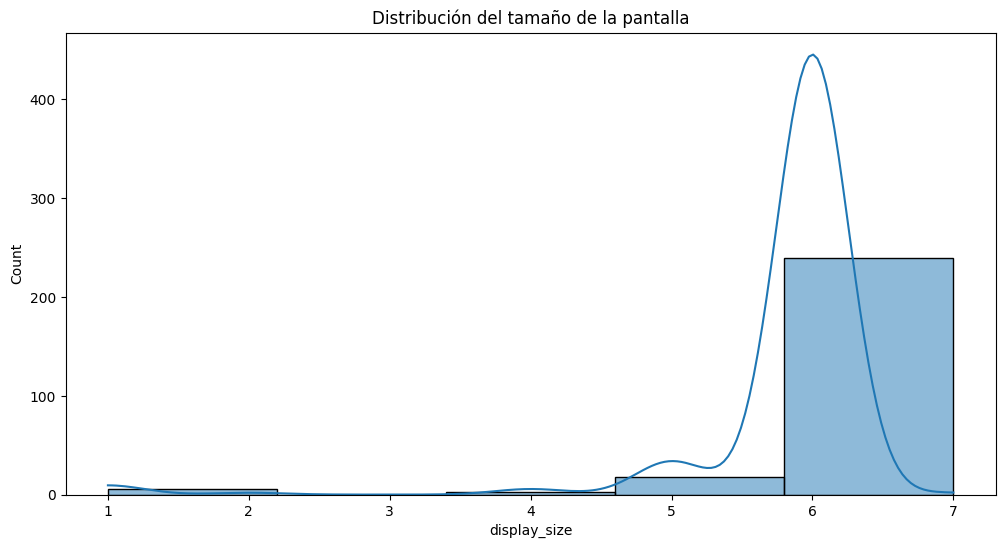

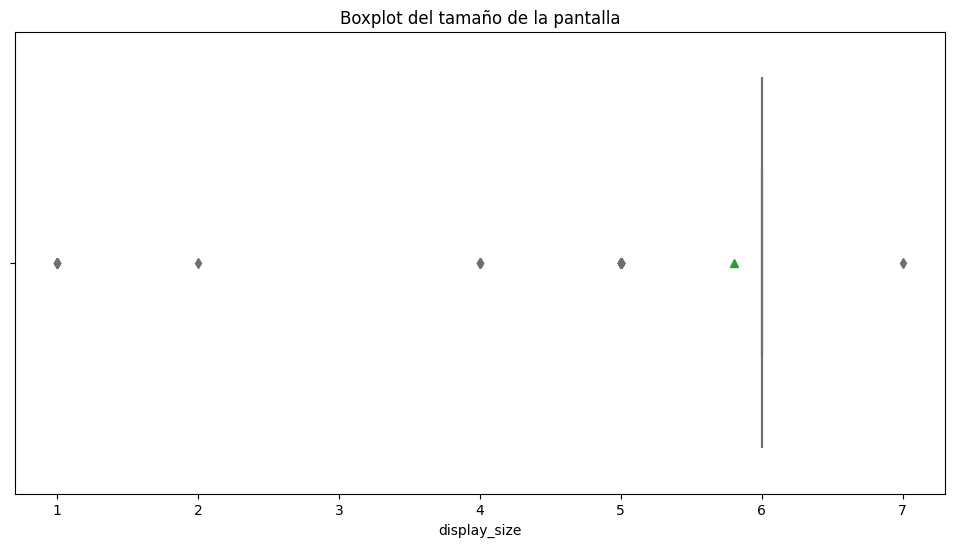

In [109]:
# Histograma de la variable "price"
plt.figure(figsize=(12, 6))
sns.histplot(df['display_size'], kde=True, bins=5)
plt.title('Distribución del tamaño de la pantalla')
plt.show()

# Boxplot de la distribucion para cada variable numerica horizontal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='display_size', color='skyblue', showmeans=True, orient='h')
plt.title('Boxplot del tamaño de la pantalla')
plt.show()

**Insights**
- Como se puede ver más del 50% de los celulares tienen un tamaño de pantalla de 6 pulgadas. El celular con pantalla más pequeña es de 1 pulgada (anómalo, no hay muchos con ese valor) y el más grande tiene un tamaño de 7 pulgadas.

#### 9. weight

In [110]:
df["weight"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    266.000000
mean     188.075188
std       29.889766
min       75.000000
5%       136.250000
25%      178.000000
50%      189.000000
75%      199.000000
95%      232.000000
max      324.000000
Name: weight, dtype: float64

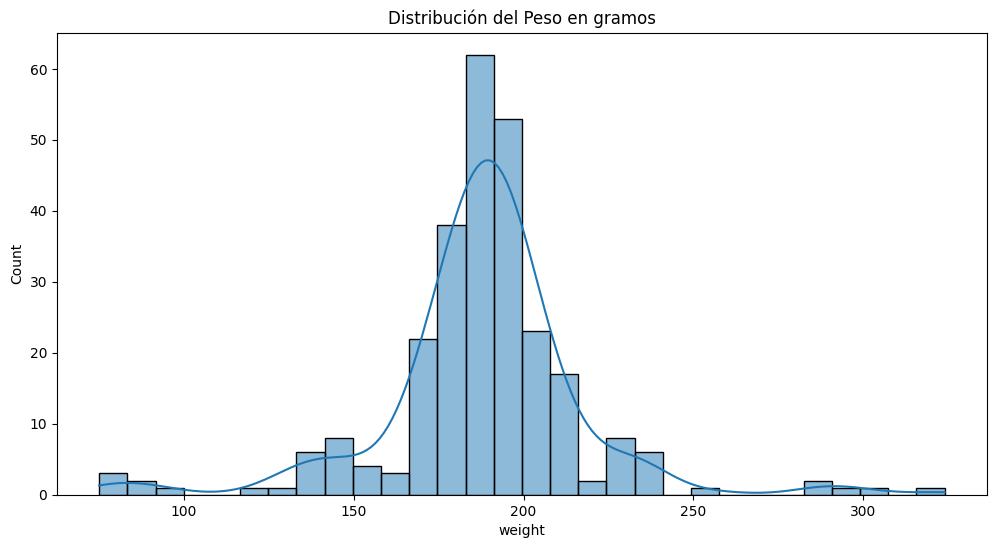

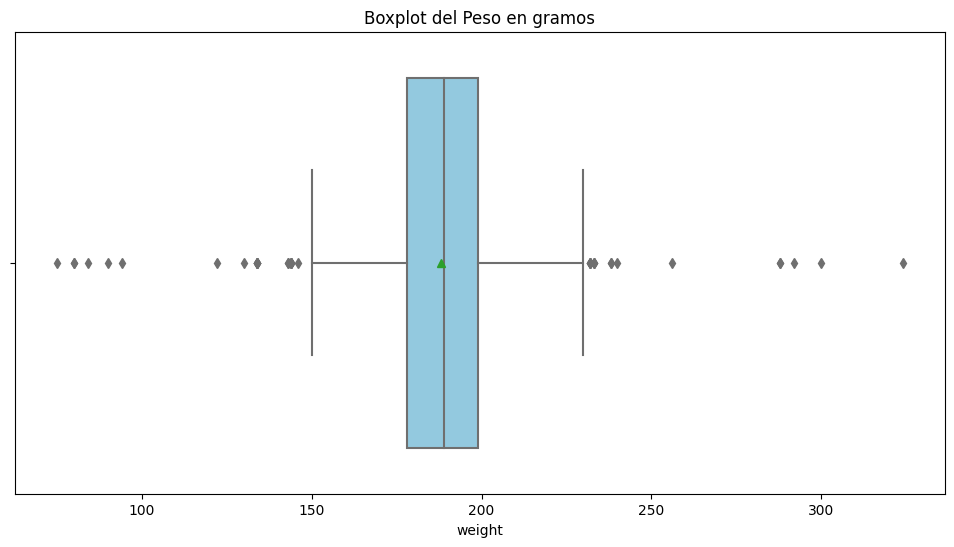

In [111]:
# Histograma de la variable "price"
plt.figure(figsize=(12, 6))
sns.histplot(df['weight'], kde=True, bins=30)
plt.title('Distribución del Peso en gramos')
plt.show()

# Boxplot de la distribucion para cada variable numerica horizontal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='weight', color='skyblue', showmeans=True, orient='h')
plt.title('Boxplot del Peso en gramos')
plt.show()


**Insights**
- El peso de los celulares ofrecidos oscila entre 75 y 324 gramos. 
- El peso en general de todos los celulares es bajito.

#### 10. free_shipping

In [112]:
df["free_shipping"].value_counts(normalize=True)

free_shipping
True    1.0
Name: proportion, dtype: float64

**Insight**
- Todos los celulares tienen envío gratis

### Análisis bivariado

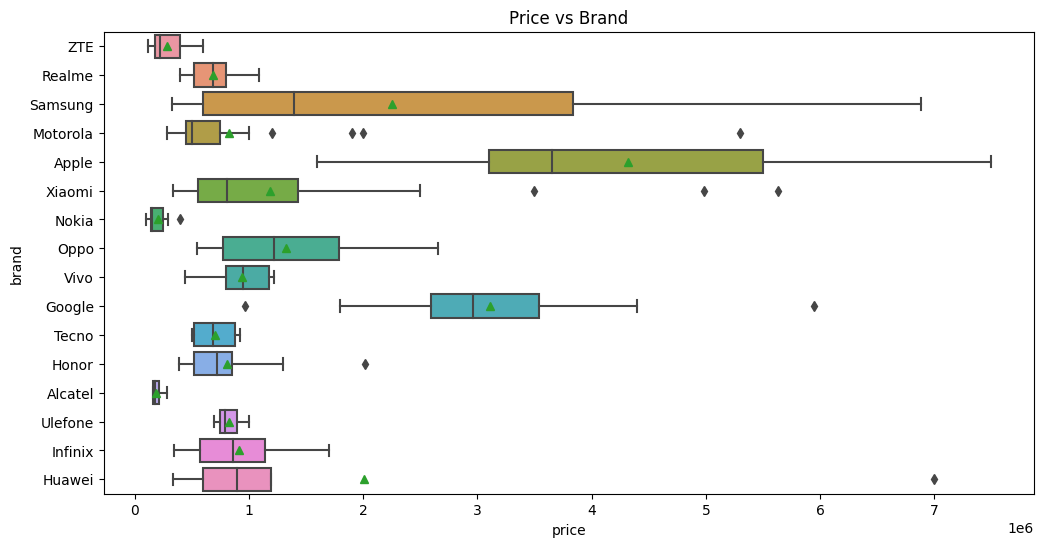

In [113]:
#Relación price vs brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='brand', data=df, showmeans=True)
plt.title('Price vs Brand')
plt.show()

Como se puede ver los celulares con mayor precio son los de la marca Apple. Mientras tanto, Samsung ofrece celulares de una gran variedad de precios. Otra marca que ofrece celulares a precios altos es Google. 

Se puede ver que las marcas que ofrecen celulares con un precio menor al que se está buscando son: Huawei, Infinix, Ulefone, Alcatel, Honor, Tecno, Vivo, Oppo, Nokia, Xiaomi, Motorola, Samsung, Realme y ZTE.

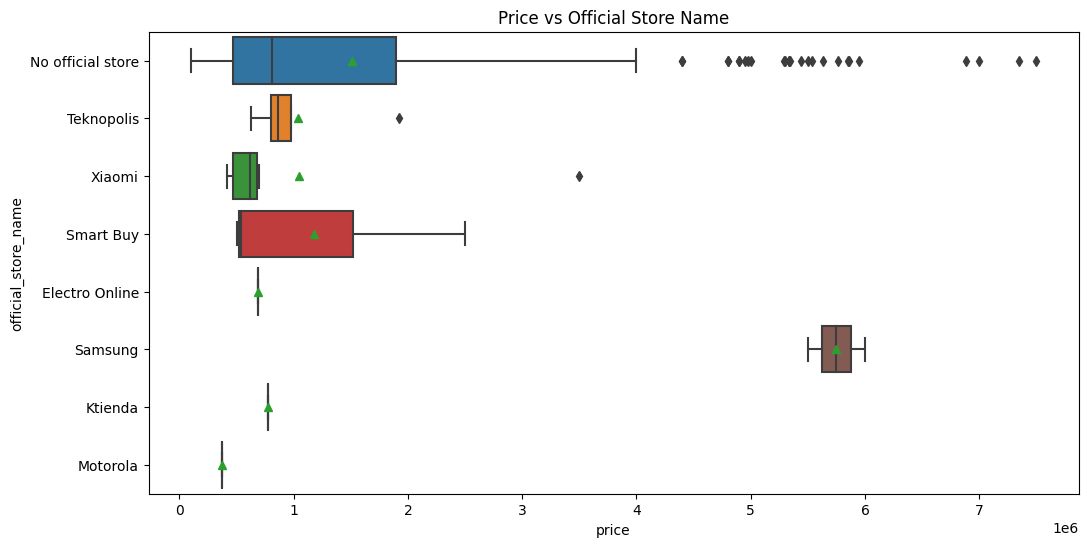

In [114]:
# Relación price y official_store_name
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='official_store_name', data=df, showmeans=True)
plt.title('Price vs Official Store Name')
plt.show()

**Insight**
- El único celular que su precio es más elevado por ser vendido por la tienda oficial es Samsung.

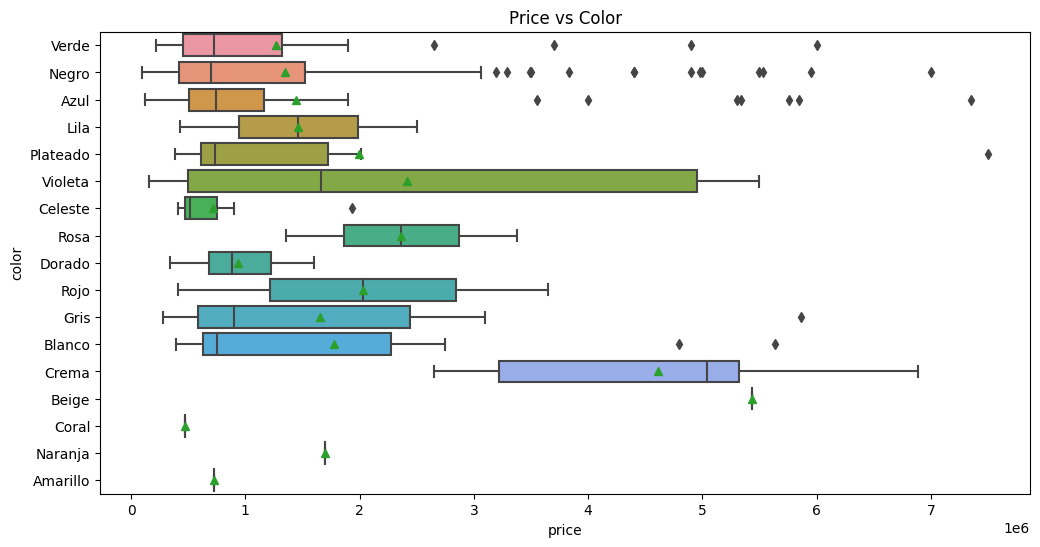

In [115]:
# Relación price y color
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='color', data=df, showmeans=True)
plt.title('Price vs Color')
plt.show()

**Insights**
- Los colores más neutros y comunes tienen precios más bajos.
- Los colores más exóticos (como el violeta, rosa, rojo, crema) tienen precios más altos.

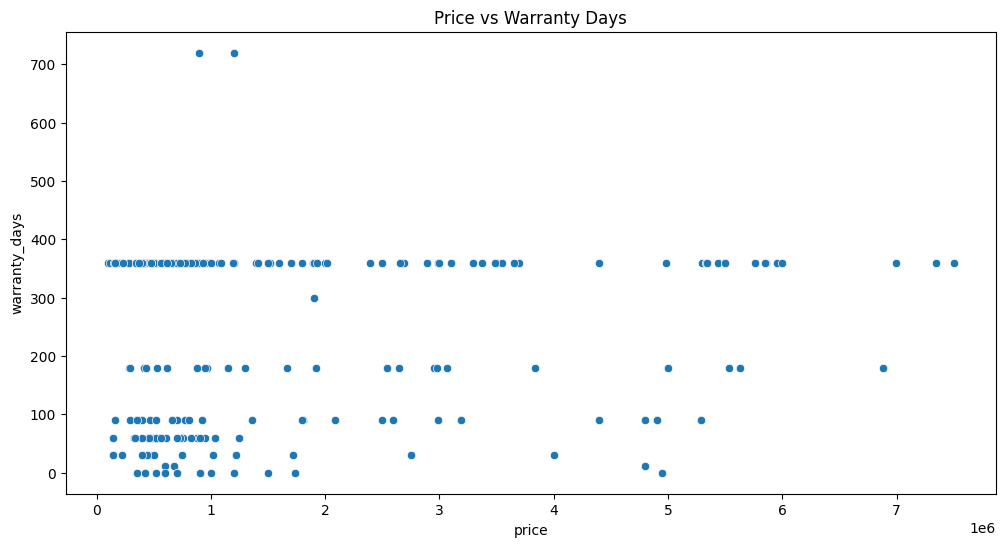

In [116]:
# Relación price y garantía en días
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='warranty_days', data=df)
plt.title('Price vs Warranty Days')
plt.show()

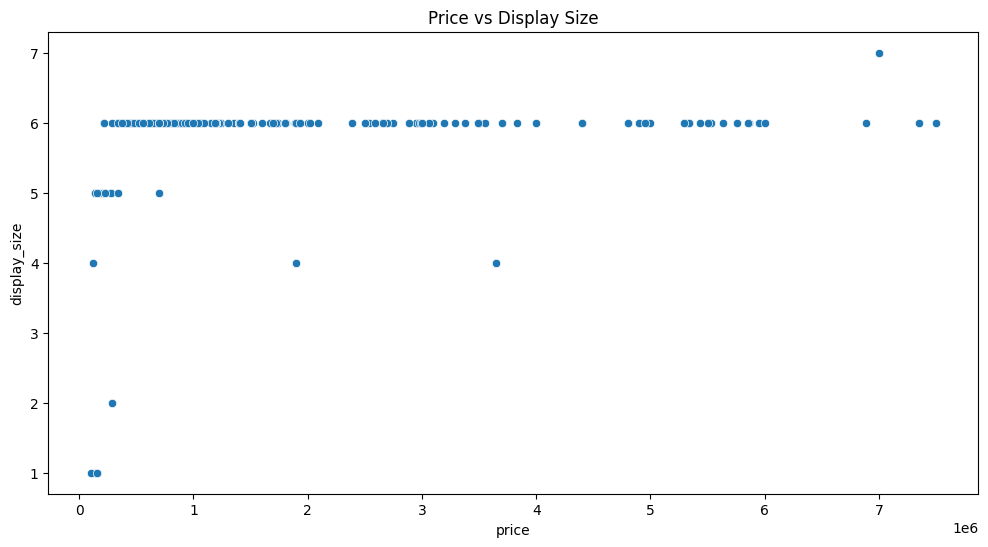

In [117]:
# Relación price y tamaño de pantalla
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='display_size', data=df)
plt.title('Price vs Display Size')
plt.show()

**Insights**
- No se ve una relación clara entre los días de garantía y el precio del celular
- No se ve una relación clara entre el tamaño de la pantalla y el precio. 

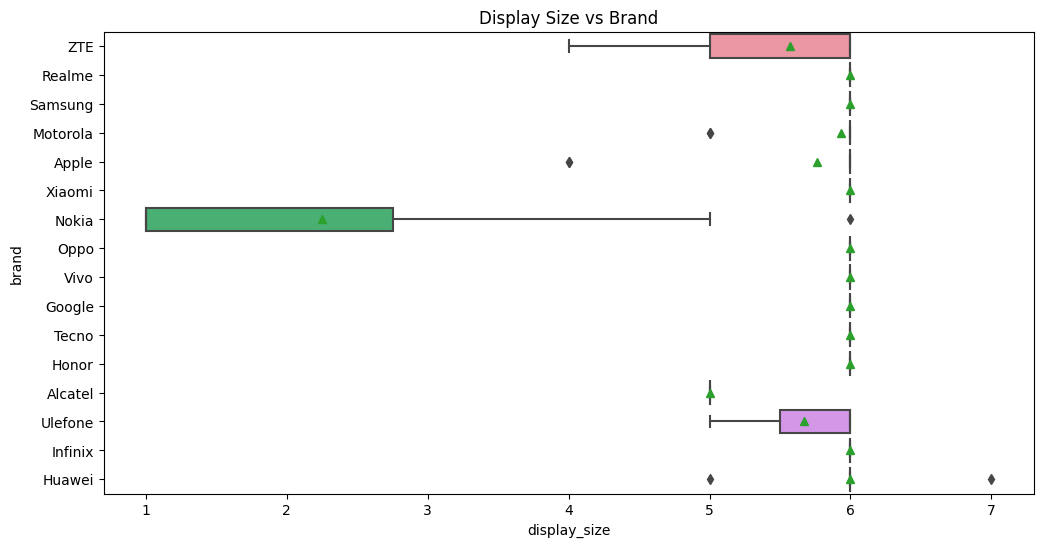

In [118]:
# Relación entre display_size y brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='display_size', y='brand', data=df, showmeans=True)
plt.title('Display Size vs Brand')
plt.show()

**Insights**
- Los celulares con pantalla más pequeña son los de la marca Nokia.
- El resto de marcas ofrecen celulares con un tamaño de pantalla entre 5 y 6 pulgadas en promedio.

In [119]:
df

,id,seller_id,currency_id,price,warranty_days,country_id,state_id,display_size,model,level_id,official_store_name,brand,color,weight,free_shipping
4,MCO2602949080,1536284902,COP,219900,360,CO,CO-CUN,6.0,A5 2020 Dual SIM,5_green,No official store,ZTE,Verde,155.0,True
6,MCO1331956853,138449369,COP,685900,360,CO,CO-ANT,6.0,C55,5_green,No official store,Realme,Negro,189.0,True
11,MCO2263793320,476229825,COP,519920,0,CO,CO-DC,6.0,A03,5_green,No official store,Samsung,Azul,196.0,True
13,MCO1480703565,44664184,COP,5300000,360,CO,CO-DC,6.0,Razr 50 Ultra (eSIM),5_green,No official store,Motorola,Azul,189.0,True
14,MCO1421298123,244067605,COP,429900,180,CO,CO-ANT,6.0,G14,5_green,No official store,Motorola,Lila,177.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,MCO1410117557,138449369,COP,999000,360,CO,CO-ANT,6.0,A15 Dual SIM 4G,5_green,No official store,Samsung,Azul,200.0,True
842,MCO1439329189,1573292268,COP,339000,60,CO,CO-CAS,5.0,Y5 Lite 2017,5_green,No official store,Huawei,Dorado,175.0,True
854,MCO1457449153,1790854165,COP,699900,60,CO,CO-DC,6.0,REDMI 12,5_green,No official store,Xiaomi,Negro,198.0,True
856,MCO1609873166,19576477,COP,523200,90,CO,CO-DC,6.0,Note 11 (Snapdragon),5_green,No official store,Xiaomi,Gris,179.0,True


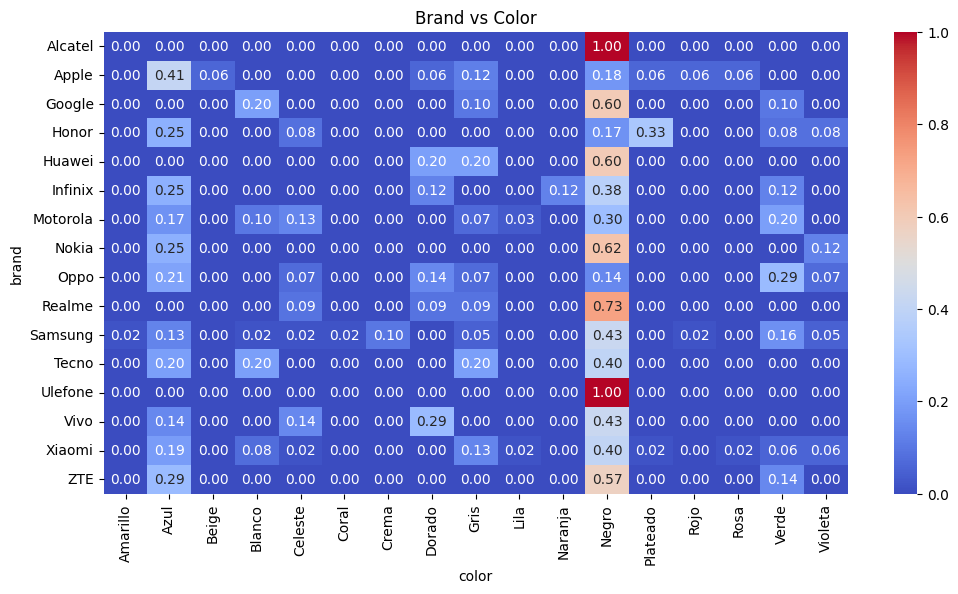

In [120]:
# Tabla cruzada de brand y color como heat map normalized by INDEX, que el color s eafecta
brand_color = pd.crosstab(df['brand'], df['color'], normalize='index')
plt.figure(figsize=(12, 6))
sns.heatmap(brand_color, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Brand vs Color')
plt.show()


**Insights**
- El color más popular para la mayoría de marcas es el negro. 
- El color negro es el único que todas las marcas ofrecen. 
- Colores que también ofrecen varias marcas: azul, gris, verde.

### Análisis multivariado

                  price  warranty_days    weight  display_size
price          1.000000       0.065434  0.254892      0.192210
warranty_days  0.065434       1.000000 -0.000037     -0.012712
weight         0.254892      -0.000037  1.000000      0.648788
display_size   0.192210      -0.012712  0.648788      1.000000


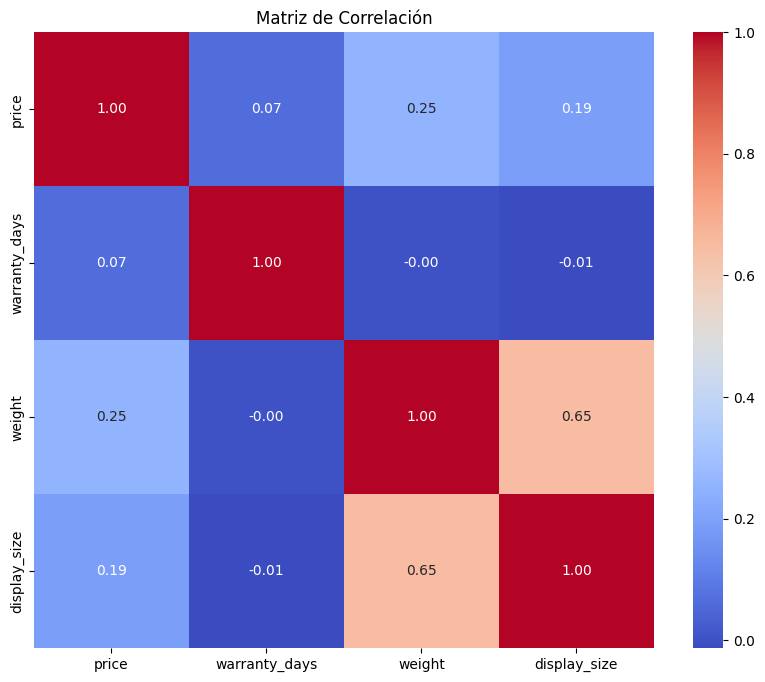

In [121]:
# Explorar relación entre price, accommodates y availability_365 con prueba de correlación y visualizamos la matriz de correlación
correlation = df[["price", "warranty_days", "weight", "display_size"]].corr()
print(correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Matriz de Correlación')
plt.show()

**Insights**
- Los dispositivos más pesados tienden a tener pantallas más grandes
- El peso tiene una leve relación con el precio.
- La garantía no está relacionada con ninguna de las características analizadas (precio, peso, tamaño de la pantalla).

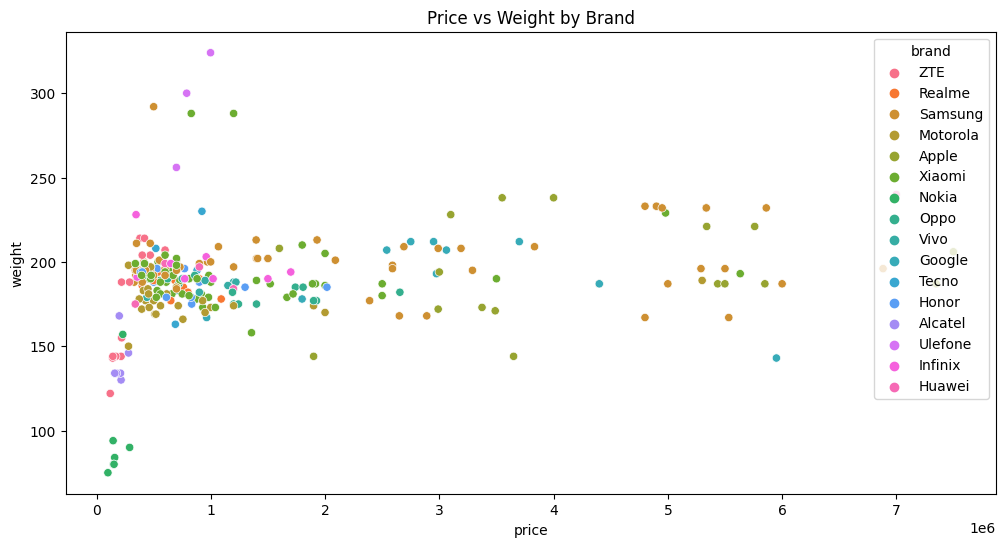

In [122]:
# Relación entre price, color y brand
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='weight', hue='brand', data=df)
plt.title('Price vs Weight by Brand')
plt.show()


**Insights**
- No se observa una relación clara entre el peso, precio y la marca. No obstante, si se ve que las marcas que suelen tener mayores precios (como notado antes), son Apple, Google y Samsung.

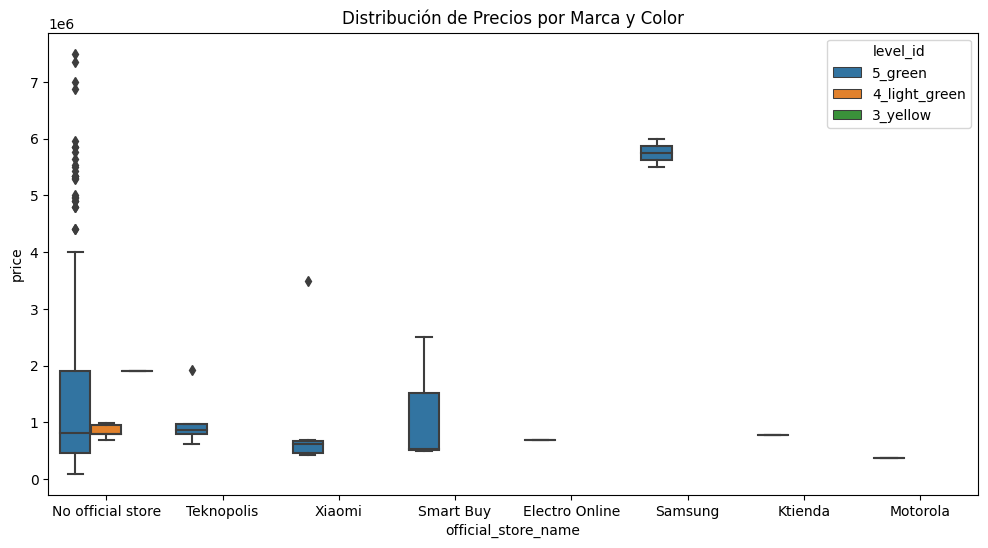

In [123]:
# Relacion entre price, brand y level_id
plt.figure(figsize=(12, 6))
sns.boxplot(x="official_store_name", y="price", hue="level_id", data=df)
plt.title("Distribución de Precios por Marca y Color")
plt.show()

**Insights**
- Todas las tiendas oficiales, como las no oficiales tienen vendedores verdes con puntuación de 5. 
- La reputación de los vendedores es bastanta buena.

### Insights generales

1. **Precio**: El 65% de los celulares están por debajo de $1,199,224 COP (dentro del presupuesto). Por otra parte los celulares de Apple tienen un rango de precios más altos; mientras que marcas como Samsung tiene una mayor variabilidad en su precio. Huawei, Infinix, Ulefone, Alcatel, Honor, Tecno, Vivo, Oppo, Nokia, Xiaomi, Motorola, Samsung, Realme y ZTE ofrecen opciones más económicas por debajo del presupuesto que mencionas.
2. **Garantía**: El 68% de los celulares tienen 6 meses o más de garantía, lo que representa una ventaja en términos de respaldo post-compra. Por otra parte, no se observa una relación clara entre la garantía y el precio, por lo que no se puede decir que un celular más caro tenga una garantía más larga.
3. **Peso y tamaño de la pantalla**: Hay una relación positiva entre el peso y el tamaño de pantalla, los teléfonos con pantallas más grandes tienden a ser más pesados. La mayoría de celulares tienen una pantalla de 6 pulgadas o más. Las pantallas más pequeñas son raras, con excepciones notbales para la marca Nokia. El peso de los celulares oscila entre 75 y 324 gramos.
4. **Reputación del vendedor**: Casi todos los vendedores tienen una excelente reputación (vendedores verdes con puntuación de 5), lo que indica un nivel de confianza alto para la mayoría de los productos. No muchos celulares son vendidos por tiendas oficiales, lo que refuerza la idea de que la reputación del vendedor debe ser un factor clave en la decisión de compra.
5. **Distribución geográfica**: La mayoría de los celulares se venden desde regiones centrales del país (DC, ANT, CUN), lo cual es beneficioso para tiempos de envío, ya que suelen demorar de 2 a 3 días.
6. **Colores**: Los colores más comunes son el negro, azul, verde y gris. Colores más exóticos como violeta, rosa, rojo y crema tienden a tener un precio más elevado, probablemente por ser menos comunes.

### ¿Qué tantas opciones (variabilidad) en función de la marca, precio u otros dos atributos relevantes hay en los celulares disponibles?

- Marca: Hay una alta variabilidad en las marcas disponibles: desde Apple, Samsung, Motorola, Xiaomi, hasta marcas menos conocidas como Tecno, Vivo, Oppo y Infinix. Sin embargo, las marcas más comunes son Samsung, Apple, Xiaomi y Motorola, lo cual indica una variedad respetable de opciones para los consumidores.
- Precio: En términos de precio, hay una amplia gama que varía desde $99,799 COP hasta $7,498,750 COP. Esto proporciona muchas opciones, especialmente si se buscan celulares que se ajusten a un presupuesto específico. Apple y Google tienden a ofrecer celulares en el rango de precios más altos, mientras que marcas como Samsung, Motorola y Xiaomi ofrecen una gama más diversa con opciones tanto económicas como premium.
- Garantía y Tamaño de Pantalla: Existe buena variabilidad en la garantía. Hay celulares sin garantía, como también opciones con 3 meses hasta 2 años. Aunque no parece haber una correlación fuerte entre precio y garantía, esta variabilidad permite a los compradores elegir opciones según sus preferencias de respaldo post-compra.
- El tamaño de la pantalla también varía considerablemente, con la mayoría de los teléfonos teniendo entre 5 y 6 pulgadas, pero algunos fuera de estos rangos, tanto más pequeños como más grandes.

En conclusión, hay mucha variabilidad en cuanto a marca, precio y peso, lo que permite al consumidor elegir un celular que mejor se ajuste a sus necesidades y preferencias, especialmente si se consideran factores como la reputación del vendedor y la garantía del dispositivo.

## Punto 3: Diseño y desarrollo de la estrategia de recomendación

### 3.1. Diseño de la estrategia

1. Definir requisitos y preferencias: Se debe establecer un rango de precios, marcas preferidas, tamaño de pantalla deseado, garantía mínima requerida y preferencia por vendedores verdes.
2. Filtrar el dataset: Utilizar los requisitos y preferencias definidos para filtrar el dataset y seleccionar los celulares que cumplan con estos criterios y a partir de esto crear un subconjunto de datos.
3. Análisis comparativo de características: 
    - Agrupación de datos: Clasificar o agrupar los celulares filtrados en grupos según características comunes, como precio y garantía
    - Pruebas estadísticas: 
        - ANOVA: aplicar ANOVA para evaluar si hay diferencias significativas en el precio de los celulares entre las diferentes marcas (ej. Apple vs. Samsung). Esta prueba permitirá determinar si las diferencias observadas en los precios son estadísticamente significativas, lo que ayudará a decidir si es viable optar por una marca más costosa.
        - Chi-cuadrado: utilizar una prueba de chi-cuadrado para analizar la relación entre la garantía y el precio de los celulares. Esto permitirá determinar si la garantía influye en el precio de los celulares y si es un factor relevante a considerar en la decisión de compra. Además, una test de chi-cuadrado entre la marca y el precio para ver si hay relación entre estos dos.
        - Correlación: analizar la correlación entre el precio, tamaño de la pantalla y peso del celular. Esto puede ayudar a identiificar patrones de precio que podrían indicar que ciertas características justifican costos más altos.
4. Seleccionar el mejor celular: Basado en los resultados de las pruebas estadísticas, seleccionar el grupo de celulares que demuestren tener el mejor equilibrio entre calidad, características y precio. Las conclusiones de estas pruebas proporcionarán un respaldo empírico a la decisión final.

### 3.2. Desarrollo del proceso de selección de productos

#### 1. Definir requisitos y preferencias

- Precio: Idealmente que sea menor a $1,200,000 COP, pero por el momento se puede considerar un rango de precios hasta los $2,000,000 COP.
- Garantía: Preferiblemente 6 meses o más.
- Marca: Preferiblemente que sea de una marca popular y concurrida: Samsung, Apple, Xiaomi, Motorola.
- Departamento: Preferiblemente que el vendedor esté en Bogotá, Antioquia o Cundinamarca, para garantizar un envío rápido.
- Reputación del vendedor: Preferiblemente que sea un vendedor verde con puntuación de 5, en su defecto de 4.
- Tienda oficial: No es un requisito, pero si se encuentra un celular de una tienda oficial que cumpla con los demás requisitos, sería una buena opción.
- Color: No hay un color de preferencia, pero se prefiere un color suave (es decir, no colores intensos).
- Tamaño de pantalla: Preferiblemente mayor a 5 pulgadas.
- Peso: No hay un peso obligatorio, pero se prefiere un peso ligero (aprox. 200g).
- Envío gratis: Que el envío sea gratis.

#### 2. Filtrar el dataset

In [124]:
# Removemos las columnas que ya no estamos usando
df_filtrado = df.drop(["currency_id", "country_id"], axis = 1)

# Filtramos por precio
df_filtrado = df_filtrado[df_filtrado["price"] < 2000000]

# Filtramos por garantía
df_filtrado = df_filtrado[df_filtrado["warranty_days"] >= 180]

# Filtramos por marca
df_filtrado = df_filtrado[df_filtrado["brand"].isin(["Apple", "Samsung", "Xiaomi", "Huawei", "Motorola", "Google"])]

# Filtramos por departamento origen
df_filtrado = df_filtrado[df_filtrado["state_id"].isin(["CO-DC", "CO-ANT", "CO-CUN"])]

# Filtramos por reputación del vendedor
df_filtrado = df_filtrado[df_filtrado["level_id"].isin(["5_green", "4_light_green"])]

# Filtramos por tamaño de pantalla
df_filtrado = df_filtrado[df_filtrado["display_size"] >= 5]

# Filtramos por envío gratis
df_filtrado = df_filtrado[df_filtrado["free_shipping"] == True]

In [125]:
df_filtrado

,id,seller_id,price,warranty_days,state_id,display_size,model,level_id,official_store_name,brand,color,weight,free_shipping
14,MCO1421298123,244067605,429900,180,CO-ANT,6.0,G14,5_green,No official store,Motorola,Lila,177.0,True
20,MCO2184925654,162681369,1666500,180,CO-DC,6.0,Poco M6 Pro,5_green,No official store,Xiaomi,Violeta,179.0,True
48,MCO1437219607,1458725985,982998,360,CO-DC,6.0,Poco C65,5_green,No official store,Xiaomi,Negro,192.0,True
52,MCO1460191679,291001852,499900,360,CO-ANT,6.0,Note 11S 5G,5_green,No official store,Xiaomi,Celeste,195.0,True
55,MCO2541143518,1458725985,714998,360,CO-DC,6.0,G54 5G (eSIM),5_green,No official store,Motorola,Azul,174.0,True
61,MCO2335069912,207591665,416238,360,CO-ANT,6.0,G13 Dual SIM,5_green,No official store,Motorola,Negro,183.0,True
64,MCO1408695863,207591665,509900,360,CO-ANT,6.0,G52 Dual SIM,5_green,No official store,Motorola,Negro,169.0,True
73,MCO2600533716,1536284902,409900,360,CO-CUN,6.0,A02s,5_green,No official store,Samsung,Rojo,196.0,True
84,MCO2524457846,138449369,972900,360,CO-ANT,6.0,A15 5G,5_green,No official store,Samsung,Azul,200.0,True
108,MCO2516195480,291001852,916900,360,CO-ANT,6.0,Poco X6 5G,5_green,No official store,Xiaomi,Blanco,181.0,True


In [126]:
df_filtrado.shape

(65, 13)

#### 3. Análisis comparativo de características

##### 3.1. Agrupación de datos

In [127]:
# Agrupamos por precio
df_filtrado['price_category'] = pd.cut(df_filtrado['price'], bins=[0, 600000, 1200000, 2000000], labels=['Bajo', 'Medio', 'Alto'])

# Agrupamos por garantía
df_filtrado['warranty_category'] = pd.cut(df_filtrado['warranty_days'], bins=[179, 359, 720], labels=['Media', 'Alta'])

##### 3.2. Pruebas estadísticas

**Chi-cuadrado**

In [128]:
print("=== Prueba chi-cuadrado para price_category y brand ===")

# Chi-cuadrado para price_category y brand
cross_tab = pd.crosstab(df_filtrado['price_category'], df_filtrado['brand'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)
print(f"\nChi-cuadrado: {chi2}")
print(f"p-value: {p}")

# Resultado escrito
if p < 0.05:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula, es decir, no hay evidencia suficiente para afirmar que existe una relación significativa entre \nlas categorías de precio y las marcas de los celulares")

print("\n\n=== Prueba chi-cuadrado para price_category y warranty_category ===")

# Chi-cuadrado para price_category y warranty_category
cross_tab = pd.crosstab(df_filtrado['price_category'], df_filtrado['warranty_category'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)
print(f"\nChi-cuadrado: {chi2}")
print(f"p-value: {p}")

# Resultado escrito
if p < 0.05:
    print("Rechazamos la hipótesis nula")
else:   
    print("No podemos rechazar la hipótesis nula,  es decir, no hay evidencia suficiente para afirmar que existe una relación significativa entre \nlas categorías de precio y las categorías de garantía de los celulares")


=== Prueba chi-cuadrado para price_category y brand ===

Chi-cuadrado: 7.125981914504933
p-value: 0.5231032760153205
No podemos rechazar la hipótesis nula, es decir, no hay evidencia suficiente para afirmar que existe una relación significativa entre 
las categorías de precio y las marcas de los celulares


=== Prueba chi-cuadrado para price_category y warranty_category ===

Chi-cuadrado: 0.11010728402032738
p-value: 0.9464343779492723
No podemos rechazar la hipótesis nula,  es decir, no hay evidencia suficiente para afirmar que existe una relación significativa entre 
las categorías de precio y las categorías de garantía de los celulares


**ANOVA**

In [129]:
# verificamos normalidad
print("=== Prueba de normalidad para price ===\n")
stat, p = stats.shapiro(df_filtrado['price'])
print(f"Estadístico: {stat}, p-value: {p}")

# Resultado escrito
if p < 0.05:
    print("Rechazamos la hipótesis nula, por lo que no se cumple la normalidad")
else:
    print("No podemos rechazar la hipótesis nula, es decir, no hay evidencia suficiente para afirmar que la variable price sigue una distribución normal")

=== Prueba de normalidad para price ===

Estadístico: 0.857774019241333, p-value: 2.460322775732493e-06
Rechazamos la hipótesis nula, por lo que no se cumple la normalidad


In [130]:
# verificamos homogeneidad de varianzas
print("\n\n=== Prueba de homogeneidad de varianzas para price ===")

stat, p = stats.levene(df_filtrado['price'][df_filtrado['brand'] == 'Apple'],
                       df_filtrado['price'][df_filtrado['brand'] == 'Samsung'],
                       df_filtrado['price'][df_filtrado['brand'] == 'Xiaomi'],
                       df_filtrado['price'][df_filtrado['brand'] == 'Huawei'],
                       df_filtrado['price'][df_filtrado['brand'] == 'Motorola'])
print(f"Estadístico: {stat}, p-value: {p}")

# Resultado escrito
if p < 0.05:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")



=== Prueba de homogeneidad de varianzas para price ===
Estadístico: 0.5289679522647249, p-value: 0.714857441981678
No podemos rechazar la hipótesis nula


Como no se cumple la prueba de normalidad, no podemos hacer un ANOVA, por lo que haremos una prueba de Kruskal-Wallis para comparar los precios de los celulares de las diferentes marcas.

In [131]:
print("=== Prueba de Kruskal-Wallis para price y brand ===\n")

# Suponiendo que tienes tres marcas
stat, p = stats.kruskal(
    df_filtrado['price'][df_filtrado['brand'] == 'Apple'],
    df_filtrado['price'][df_filtrado['brand'] == 'Samsung'],
    df_filtrado['price'][df_filtrado['brand'] == 'Xiaomi'],
    df_filtrado['price'][df_filtrado['brand'] == 'Huawei'],
    df_filtrado['price'][df_filtrado['brand'] == 'Motorola']
)
print(f"Estadístico: {stat}, p-value: {p}")

# Resultado escrito
if p < 0.05:
    print("Rechazamos la hipótesis nula, por lo que hay diferencias significativas entre al menos dos de las marcas")
else:
    print("No podemos rechazar la hipótesis nula, es decir, no hay evidencia suficiente para afirmar que hay diferencias significativas entre los precios de las diferentes marcas.")

=== Prueba de Kruskal-Wallis para price y brand ===

Estadístico: 4.724029532922873, p-value: 0.3168032566329891
No podemos rechazar la hipótesis nula, es decir, no hay evidencia suficiente para afirmar que hay diferencias significativas entre los precios de las diferentes marcas.


**Correlación**

                  price  warranty_days    weight  display_size
price          1.000000       0.009197  0.007870      0.203620
warranty_days  0.009197       1.000000  0.286710      0.170941
weight         0.007870       0.286710  1.000000      0.170304
display_size   0.203620       0.170941  0.170304      1.000000


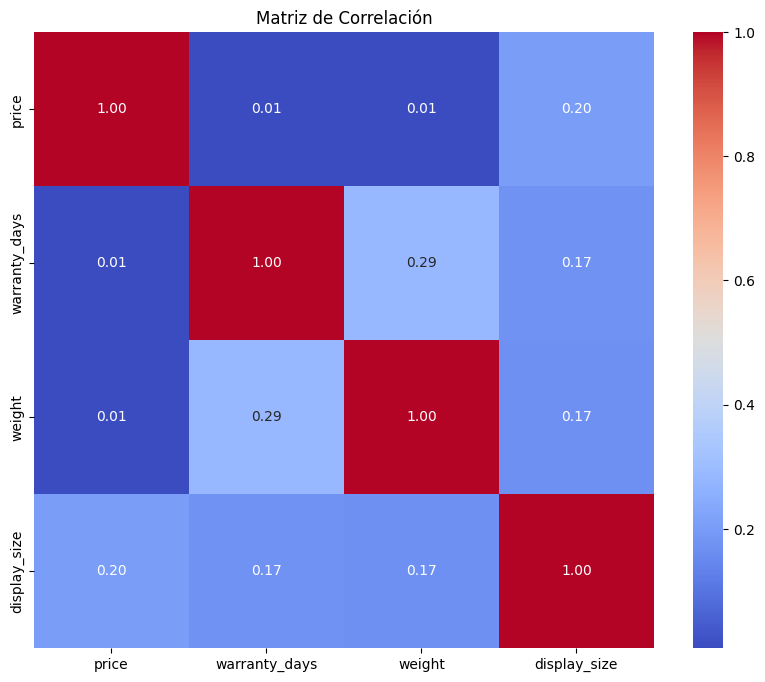

In [132]:
# Correlación price, warranty_days, weight, display_size
correlation = df_filtrado[["price", "warranty_days", "weight", "display_size"]].corr()
print(correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


**Insights**
- Relaciones débiles: La mayoría de las correlaciones son muy bajas, lo que sugiere que el precio, la garantía, el peso y el tamaño de la pantalla no están fuertemente relacionados entre sí en este conjunto de datos.

##### 3.3. Árbol de decisión

Como no se encontraron asociaciones significativas en las pruebas estadísticas, se procederá a entrenar un árbol de decisión para identificar las características más importantes en la selección de un celular (en este caso la marca). Esto podría ayudar a capturar relaciones más complejas que no se reflejaron en las pruebas anteriores.

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Convertir las variables categóricas en numéricas
encoder = LabelEncoder()
df_filtrado['brand_encoded'] = encoder.fit_transform(df_filtrado['brand'])

# Seleccionar las características y el objetivo (puedes ajustar las variables)
X = df_filtrado[['warranty_days', 'display_size',  'weight', 'price']]
y = df_filtrado['brand_encoded']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [134]:
# Crear y entrenar el modelo
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

# Evaluar el modelo
accuracy = clf.score(X_test, y_test)
print(f"Precisión del árbol de decisión: {accuracy:.2f}")


Precisión del árbol de decisión: 0.77


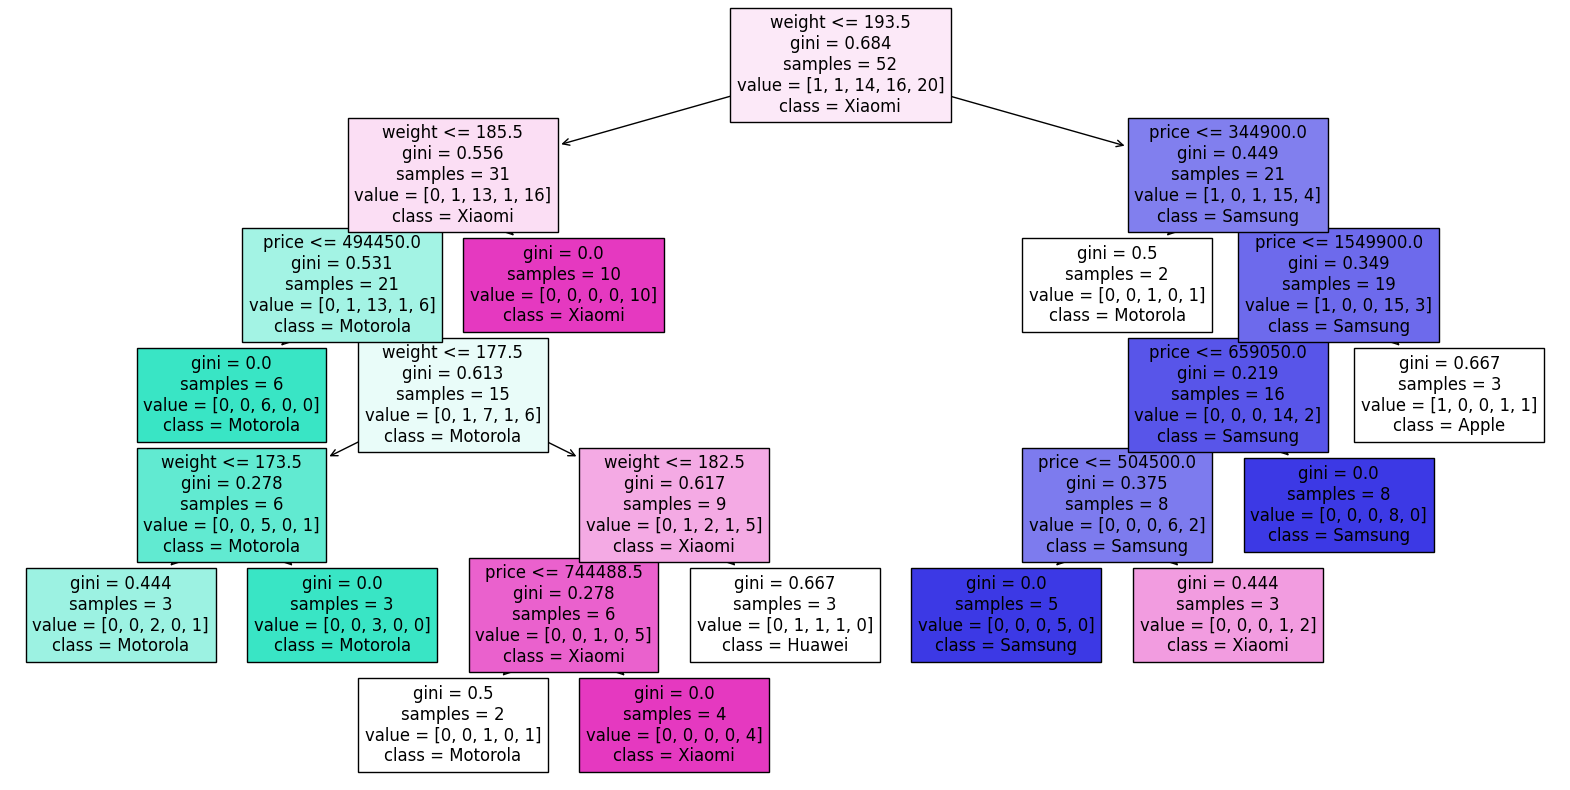

In [135]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=encoder.classes_, filled=True)#, max_depth=4)
plt.show()


In [136]:
from sklearn.tree import export_text

# Print decision tree rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


|--- weight <= 193.50
|   |--- weight <= 185.50
|   |   |--- price <= 494450.00
|   |   |   |--- class: 2
|   |   |--- price >  494450.00
|   |   |   |--- weight <= 177.50
|   |   |   |   |--- weight <= 173.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- weight >  173.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- weight >  177.50
|   |   |   |   |--- weight <= 182.50
|   |   |   |   |   |--- price <= 744488.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- price >  744488.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- weight >  182.50
|   |   |   |   |   |--- class: 1
|   |--- weight >  185.50
|   |   |--- class: 4
|--- weight >  193.50
|   |--- price <= 344900.00
|   |   |--- class: 2
|   |--- price >  344900.00
|   |   |--- price <= 1549900.00
|   |   |   |--- price <= 659050.00
|   |   |   |   |--- price <= 504500.00
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- price >  504500.00
|   |   |   |   |   |--- class: 4
|   |   |  

In [137]:
from sklearn.preprocessing import LabelEncoder

# Assuming this is how you encoded the 'brand' column
le = LabelEncoder()
df_filtrado['brand_encoded'] = le.fit_transform(df_filtrado['brand'])

# Print the mapping of brands to encoded classes
brand_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(brand_mapping)


{'Apple': 0, 'Huawei': 1, 'Motorola': 2, 'Samsung': 3, 'Xiaomi': 4}


**Insights del árbol**
1. Factor de decisión primario: peso
    - El nodo raíz muestra que el peso es la característica más importante para dividir los datos, específicamente en torno a 193.50 y 185.50. Esto indica que el peso de los smartphones tiene una influencia significativa en la clasificación de sus marcas. Los teléfonos más ligeros (peso <= 185.50) se dividen posteriormente según el precio, lo que muestra que los teléfonos más ligeros tienden a pertenecer a menos marcas (principalmente Motorola (2) y Xiaomi (4)).
2. El precio como segundo factor de decisión
    - Para los teléfonos más pesados (peso > 193.50), el precio se convierte en el siguiente factor de decisión. Los teléfonos más pesados con precios más bajos tienden a ser de la marca Motorola (2), mientras que los teléfonos más pesados con precios más altos tienden a ser de la marca Apple (0).
3. Tamaño de pantalla y garantía
    - El tamaño de la pantalla y la garantía no parecen ser factores de decisión significativos en este árbol, lo que sugiere que el peso y el precio son los principales impulsores de la clasificación de los teléfonos.

### 3.3. Recomendación final

Finalmente, como las pruebas estadísticas no mostraron asociaciones significativas entre las características de los celulares, no se justifica escoger una marca sobre otra basándose en estas pruebas. Por otro lado, el árbol no identificó relaciones atractivas, debido a que el peso del celular era el factor menos relevante en la selección del celular. Adicionalmente, no se tuvo en cuenta ni la garantía ni el tamaño de la pantalla. 

Por lo tanto, se recomienda seleccionar un celular que cumpla con los requisitos y preferencias establecidos previamente, teniendo en cuenta el rango de precios, garantía, reputación del vendedor, ubicación del vendedor, tamaño de pantalla, peso y envío gratis.

In [138]:
# Filtraremos más estrechamente los datos en precio
df_filtrado = df_filtrado[df_filtrado["price"] < 1200000]
df_filtrado

,id,seller_id,price,warranty_days,state_id,display_size,model,level_id,official_store_name,brand,color,weight,free_shipping,price_category,warranty_category,brand_encoded
14,MCO1421298123,244067605,429900,180,CO-ANT,6.0,G14,5_green,No official store,Motorola,Lila,177.0,True,Bajo,Media,2
48,MCO1437219607,1458725985,982998,360,CO-DC,6.0,Poco C65,5_green,No official store,Xiaomi,Negro,192.0,True,Medio,Alta,4
52,MCO1460191679,291001852,499900,360,CO-ANT,6.0,Note 11S 5G,5_green,No official store,Xiaomi,Celeste,195.0,True,Bajo,Alta,4
55,MCO2541143518,1458725985,714998,360,CO-DC,6.0,G54 5G (eSIM),5_green,No official store,Motorola,Azul,174.0,True,Medio,Alta,2
61,MCO2335069912,207591665,416238,360,CO-ANT,6.0,G13 Dual SIM,5_green,No official store,Motorola,Negro,183.0,True,Bajo,Alta,2
64,MCO1408695863,207591665,509900,360,CO-ANT,6.0,G52 Dual SIM,5_green,No official store,Motorola,Negro,169.0,True,Bajo,Alta,2
73,MCO2600533716,1536284902,409900,360,CO-CUN,6.0,A02s,5_green,No official store,Samsung,Rojo,196.0,True,Bajo,Alta,3
84,MCO2524457846,138449369,972900,360,CO-ANT,6.0,A15 5G,5_green,No official store,Samsung,Azul,200.0,True,Medio,Alta,3
108,MCO2516195480,291001852,916900,360,CO-ANT,6.0,Poco X6 5G,5_green,No official store,Xiaomi,Blanco,181.0,True,Medio,Alta,4
115,MCO2154362844,76502426,930000,360,CO-ANT,6.0,12 Lite 5G,5_green,No official store,Xiaomi,Negro,173.0,True,Medio,Alta,4


In [139]:
# Filtramos por tienda oficial
df_filtrado = df_filtrado[df_filtrado["official_store_name"] != "No official store"]
df_filtrado

,id,seller_id,price,warranty_days,state_id,display_size,model,level_id,official_store_name,brand,color,weight,free_shipping,price_category,warranty_category,brand_encoded
125,MCO1397522805,470474833,539000,360,CO-CUN,6.0,10 5G,5_green,Smart Buy,Xiaomi,Gris,200.0,True,Bajo,Alta,4
177,MCO1433698769,736690803,688900,360,CO-CUN,6.0,A15,5_green,Electro Online,Samsung,Azul,200.0,True,Medio,Alta,3
446,MCO2236134602,205606809,979900,360,CO-CUN,6.0,Poco M6 Pro,5_green,Teknopolis,Xiaomi,Negro,179.0,True,Medio,Alta,4
481,MCO1333808197,394887418,629000,360,CO-CUN,6.0,12C Dual SIM,5_green,Xiaomi,Xiaomi,Gris,192.0,True,Medio,Alta,4
717,MCO2661564520,470474833,500000,360,CO-CUN,6.0,A06,5_green,Smart Buy,Samsung,Verde,292.0,True,Bajo,Alta,3
829,MCO1454882531,530380977,373900,360,CO-DC,6.0,G04S,5_green,Motorola,Motorola,Verde,178.0,True,Bajo,Alta,2


In [140]:
# Filtramos por reputación del vendedor
df_filtrado = df_filtrado[df_filtrado["level_id"] == "5_green"]
df_filtrado

,id,seller_id,price,warranty_days,state_id,display_size,model,level_id,official_store_name,brand,color,weight,free_shipping,price_category,warranty_category,brand_encoded
125,MCO1397522805,470474833,539000,360,CO-CUN,6.0,10 5G,5_green,Smart Buy,Xiaomi,Gris,200.0,True,Bajo,Alta,4
177,MCO1433698769,736690803,688900,360,CO-CUN,6.0,A15,5_green,Electro Online,Samsung,Azul,200.0,True,Medio,Alta,3
446,MCO2236134602,205606809,979900,360,CO-CUN,6.0,Poco M6 Pro,5_green,Teknopolis,Xiaomi,Negro,179.0,True,Medio,Alta,4
481,MCO1333808197,394887418,629000,360,CO-CUN,6.0,12C Dual SIM,5_green,Xiaomi,Xiaomi,Gris,192.0,True,Medio,Alta,4
717,MCO2661564520,470474833,500000,360,CO-CUN,6.0,A06,5_green,Smart Buy,Samsung,Verde,292.0,True,Bajo,Alta,3
829,MCO1454882531,530380977,373900,360,CO-DC,6.0,G04S,5_green,Motorola,Motorola,Verde,178.0,True,Bajo,Alta,2


In [141]:
# Filtramos que la marca sea igual offical_store_name
df_filtrado = df_filtrado[df_filtrado["brand"] == df_filtrado["official_store_name"]]
df_filtrado

,id,seller_id,price,warranty_days,state_id,display_size,model,level_id,official_store_name,brand,color,weight,free_shipping,price_category,warranty_category,brand_encoded
481,MCO1333808197,394887418,629000,360,CO-CUN,6.0,12C Dual SIM,5_green,Xiaomi,Xiaomi,Gris,192.0,True,Medio,Alta,4
829,MCO1454882531,530380977,373900,360,CO-DC,6.0,G04S,5_green,Motorola,Motorola,Verde,178.0,True,Bajo,Alta,2


In [142]:
# Filtramos que el color sea neutro
df_filtrado = df_filtrado[df_filtrado["brand"] == df_filtrado["official_store_name"]]
df_filtrado

,id,seller_id,price,warranty_days,state_id,display_size,model,level_id,official_store_name,brand,color,weight,free_shipping,price_category,warranty_category,brand_encoded
481,MCO1333808197,394887418,629000,360,CO-CUN,6.0,12C Dual SIM,5_green,Xiaomi,Xiaomi,Gris,192.0,True,Medio,Alta,4
829,MCO1454882531,530380977,373900,360,CO-DC,6.0,G04S,5_green,Motorola,Motorola,Verde,178.0,True,Bajo,Alta,2


In [143]:
# Filtramos por color neutro
df_filtrado = df_filtrado[df_filtrado["color"].isin(["Gris", "Blanco", "Negro"])]
df_filtrado

,id,seller_id,price,warranty_days,state_id,display_size,model,level_id,official_store_name,brand,color,weight,free_shipping,price_category,warranty_category,brand_encoded
481,MCO1333808197,394887418,629000,360,CO-CUN,6.0,12C Dual SIM,5_green,Xiaomi,Xiaomi,Gris,192.0,True,Medio,Alta,4


#### **Conclusión**
Se escogió el celular de id **MCO1333808197** que cumple con los requisitos y preferencias establecidos previamente. Este celular es de la marca Xiaomi (marca conocida), tiene un precio de $629,000 COP, una garantía de 1 año, un peso de 192g, una pantalla de 6 pulgadas, es vendido por un vendedor verde con puntuación de 5, ofrece envío gratis, lo vende la tienda oficial de Xiaomi y es de color gris (color neutro). Además, el vendedor se encuentra en Cundinamarca, lo que garantiza un envío rápido. Este celular cumple con los criterios establecidos y es una excelente opción para la compra.

Adicionalmente, si se revisa el modelo es 12C, lo que indica que es un modelo reciente (2023) y actualizado. 